## Bibliotecas e carregando os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
import datetime as dt
import os
import folium

#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
#.preprocessing import Imputer
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.preprocessing import StandardScaler
#from sklearn.feature_selection import VarianceThreshold
#from sklearn.feature_selection import SelectFromModel
#from sklearn.utils import shuffle
#from sklearn.ensemble import RandomForestClassifier


pd.set_option('display.max_columns', 100)

month_num = str(8)
path_to_save = './Tempo-Clima/Analise_dados/'

if not os.path.exists(str(path_to_save+month_num)):
    os.makedirs(str(path_to_save+month_num))
    os.makedirs(str(path_to_save+month_num+'/recovery_data_analise/'))
data = pd.read_csv('./Tempo-Clima/Dados/EMA/Unidos_v2/Brasil_v2/Brasil_'+month_num+'_v4.csv')
#data = data.drop(columns=['Unnamed: 0.1','Unnamed: 0','Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1'])

# Qual o tamanho da base?

In [2]:
data.shape

(3457894, 29)

# Retirando duplicações de dados e verificando o tamanho novamente

In [3]:
data.drop_duplicates()
data.shape

(3457894, 29)

# Informações da base

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3457894 entries, 0 to 3457893
Data columns (total 29 columns):
Altitude(metros)                              float64
Codigo OMM                                    float64
Day                                           int64
H(UTC)                                        int64
Latitude                                      float64
Longitude                                     float64
Month                                         int64
Nome                                          object
PRECIPITACAO (mm)                             float64
PRESSAO ATMOSFERICA (hPa)                     float64
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              float64
PRESSAO ATMOSFÉRICA MINIMA (hPa)              float64
RADIACAO GLOBAL (KJ/M2)                       float64
TEMPERATURA DO AR (C)                         float64
TEMPERATURA DO PONTO DE ORVALHO (C)           float64
TEMPERATURA MAXIMA (C)                        float64
TEMPERATURA MINIMA (C)        

In [5]:
data.describe().T

count          mean  \
Altitude(metros)                            3457894.0    344.588356   
Codigo OMM                                  3452926.0  85352.315129   
Day                                         3457894.0     16.022666   
H(UTC)                                      3457894.0     11.499994   
Latitude                                    3457894.0    -15.843786   
Longitude                                   3457894.0    -47.759925   
Month                                       3457894.0      8.000000   
PRECIPITACAO (mm)                           3101083.0      0.058055   
PRESSAO ATMOSFERICA (hPa)                   3150530.0    968.569374   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            3148991.0    968.838099   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            3148991.0    968.294506   
RADIACAO GLOBAL (KJ/M2)                     1568328.0   1433.713913   
TEMPERATURA DO AR (C)                       3162633.0     22.047291   
TEMPERATURA DO PONTO DE ORVALHO (C)         3132889.0     13.537392   
TEMPERATURA MAXIMA (C)                      3162567.0     22.785530   
TEMPERATURA MINIMA (C)                      3162409.0     21.334151   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  3133657.0     14.094391   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  3130995.0     12.999464   
UMIDADE RELATIVA DO AR (%)                  3136376.0     63.764346   
UMIDADE RELATIVA DO MAXIMA AR (%)           3136643.0     66.612281   
UMIDADE RELATIVA DO MINIMA AR (%)           3133945.0     60.872780   
VENTO VELOCIDADE                            3096460.0      2.297826   
VENTO, DIRECAO (graus)                      3072432.0    145.995139   
VENTO, RAJADA MAXIMA (m/s)                  3093365.0      5.299104   
Year                                        3457894.0   2011.428312   

                                                    std           min  \
Altitude(metros)                             287.623245      1.001000   
Codigo OMM                                  2261.302019  81609.000000   
Day                                            8.945866      1.000000   
H(UTC)                                         6.922184      0.000000   
Latitude                                       8.150302    -33.742297   
Longitude                                      6.923937    -72.786778   
Month                                          0.000000      8.000000   
PRECIPITACAO (mm)                              0.569668      0.000000   
PRESSAO ATMOSFERICA (hPa)                     37.903368    803.900000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              37.918336    804.500000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              37.895140    803.100000   
RADIACAO GLOBAL (KJ/M2)                     1098.756022      0.000000   
TEMPERATURA DO AR (C)                          6.520240     -9.700000   
TEMPERATURA DO PONTO DE ORVALHO (C)            5.192257    -31.700000   
TEMPERATURA MAXIMA (C)                         6.636170     -9.700000   
TEMPERATURA MINIMA (C)                         6.389018     -8.700000   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     5.120746    -26.700000   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     5.264935    -34.300000   
UMIDADE RELATIVA DO AR (%)                    22.998660     10.000000   
UMIDADE RELATIVA DO MAXIMA AR (%)             22.525568      3.000000   
UMIDADE RELATIVA DO MINIMA AR (%)             23.299804      3.000000   
VENTO VELOCIDADE                               1.877819      0.000000   
VENTO, DIRECAO (graus)                        92.049275      1.000000   
VENTO, RAJADA MAXIMA (m/s)                     3.266393      0.000000   
Year                                           3.242704   2000.000000   

                                                     25%           50%  \
Altitude(metros)                               75.000000    290.000000   
Codigo OMM                                  81976.000000  86729.000000   
Day                                             8.000000     16.000000   
H(UTC)

In [6]:
data.head(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
0             185.0     81963.0    5       0 -9.358353 -69.926257      8   
1             185.0     81963.0    5       1 -9.358353 -69.926257      8   
2             185.0     81963.0    5       2 -9.358353 -69.926257      8   
3             185.0     81963.0    5       3 -9.358353 -69.926257      8   
4             185.0     81963.0    5       4 -9.358353 -69.926257      8   

                             Nome  PRECIPITACAO (mm)  \
0  Parque Estadual Chandless-A102                NaN   
1  Parque Estadual Chandless-A102                NaN   
2  Parque Estadual Chandless-A102                NaN   
3  Parque Estadual Chandless-A102                NaN   
4  Parque Estadual Chandless-A102                NaN   

   PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
0                        NaN                               NaN   
1                        NaN                               NaN   
2                        NaN                               NaN   
3                        NaN                               NaN   
4                        NaN                               NaN   

   PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
0                               NaN                      NaN   
1                               NaN                      NaN   
2                               NaN                      NaN   
3                               NaN                      NaN   
4                               NaN                      NaN   

   TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
0                    NaN                                  NaN   
1                    NaN                                  NaN   
2                    NaN                                  NaN   
3                    NaN                                  NaN   
4                    NaN                                  NaN   

   TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
0                     NaN                     NaN   
1                     NaN                     NaN   
2                     NaN                     NaN   
3                     NaN                     NaN   
4                     NaN                     NaN   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                         NaN                         NaN   
1                                         NaN                         NaN   
2                                         NaN                         NaN   
3                                         NaN                         NaN   
4                                         NaN                         NaN   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                                NaN                                NaN   
3                                NaN                                NaN   
4                                NaN                                NaN   

   VENTO VELOCIDADE   VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  \
0                NaN                     NaN                         NaN   
1                NaN                     NaN                         NaN   
2                NaN                     NaN                         NaN   
3                NaN                     NaN                         NaN   
4                NaN                     NaN                         NaN   

   Year                     Cidade Estado Regiao  


In [7]:
data.tail(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
3457889               6.0     86618.0   31      19 -10.473959 -36.482051   
3457890               6.0     86618.0   31      20 -10.473959 -36.482051   
3457891               6.0     86618.0   31      21 -10.473959 -36.482051   
3457892               6.0     86618.0   31      22 -10.473959 -36.482051   
3457893               6.0     86618.0   31      23 -10.473959 -36.482051   

         Month               Nome  PRECIPITACAO (mm)  \
3457889      8  Brejo Grande-A421                NaN   
3457890      8  Brejo Grande-A421                NaN   
3457891      8  Brejo Grande-A421                NaN   
3457892      8  Brejo Grande-A421                NaN   
3457893      8  Brejo Grande-A421                NaN   

         PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
3457889                        NaN                               NaN   
3457890                        NaN                               NaN   
3457891                        NaN                               NaN   
3457892                        NaN                               NaN   
3457893                        NaN                               NaN   

         PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
3457889                               NaN                      NaN   
3457890                               NaN                      NaN   
3457891                               NaN                      NaN   
3457892                               NaN                      NaN   
3457893                               NaN                      NaN   

         TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
3457889                    NaN                                  NaN   
3457890                    NaN                                  NaN   
3457891                    NaN                                  NaN   
3457892                    NaN                                  NaN   
3457893                    NaN                                  NaN   

         TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
3457889                     NaN                     NaN   
3457890                     NaN                     NaN   
3457891                     NaN                     NaN   
3457892                     NaN                     NaN   
3457893                     NaN                     NaN   

         TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
3457889                                         NaN   
3457890                                         NaN   
3457891                                         NaN   
3457892                                         NaN   
3457893                                         NaN   

         TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
3457889                                         NaN   
3457890                                         NaN   
3457891                                         NaN   
3457892                                         NaN   
3457893                                         NaN   

         UMIDADE RELATIVA DO AR (%)  UMIDADE RELATIVA DO MAXIMA AR (%)  \
3457889                         NaN                                NaN   
3457890                         NaN                                NaN   
3457891                         NaN                                NaN   
3457892                         NaN                                NaN   
3457893                         NaN                                NaN   

         UMIDADE RELATIVA DO MINIMA AR (%)  VENTO VELOCIDADE   \
3457889                                NaN                NaN   
3457890                                NaN                NaN   
3457891                                NaN                NaN   
3457892                                NaN                NaN   
3457893                                NaN                NaN   

         VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  Year  \
3457889     

# Temos muitos dados ausentes?

In [8]:
(data.isnull().sum()/len(data))*100

Altitude(metros)                               0.000000
Codigo OMM                                     0.143671
Day                                            0.000000
H(UTC)                                         0.000000
Latitude                                       0.000000
Longitude                                      0.000000
Month                                          0.000000
Nome                                           0.000000
PRECIPITACAO (mm)                             10.318737
PRESSAO ATMOSFERICA (hPa)                      8.888763
PRESSAO ATMOSFÉRICA MAXIMA (hPa)               8.933270
PRESSAO ATMOSFÉRICA MINIMA (hPa)               8.933270
RADIACAO GLOBAL (KJ/M2)                       54.644995
TEMPERATURA DO AR (C)                          8.538752
TEMPERATURA DO PONTO DE ORVALHO (C)            9.398929
TEMPERATURA MAXIMA (C)                         8.540661
TEMPERATURA MINIMA (C)                         8.545230
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     9

In [9]:
data.dropna().shape

(1464373, 29)

In [10]:
data.shape[0] - data.dropna().shape[0]

1993521

In [11]:
((data<0).sum()/len(data))*100

Altitude(metros)                                0.000000
Codigo OMM                                      0.000000
Day                                             0.000000
H(UTC)                                          0.000000
Latitude                                       99.285808
Longitude                                     100.000000
Month                                           0.000000
Nome                                          100.000000
PRECIPITACAO (mm)                               0.000000
PRESSAO ATMOSFERICA (hPa)                       0.000000
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                0.000000
PRESSAO ATMOSFÉRICA MINIMA (hPa)                0.000000
RADIACAO GLOBAL (KJ/M2)                         0.000000
TEMPERATURA DO AR (C)                           0.029816
TEMPERATURA DO PONTO DE ORVALHO (C)             0.446283
TEMPERATURA MAXIMA (C)                          0.021227
TEMPERATURA MINIMA (C)                          0.038202
TEMPERATURA MÁXIMA DO PONTO DE 

# Quais os valores minimos e maximos?

In [12]:
data.min()

Altitude(metros)                                      1.001
Codigo OMM                                            81609
Day                                                       1
H(UTC)                                                    0
Latitude                                           -33.7423
Longitude                                          -72.7868
Month                                                     8
Nome                                          Abrolhos-A422
PRECIPITACAO (mm)                                         0
PRESSAO ATMOSFERICA (hPa)                             803.9
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                      804.5
PRESSAO ATMOSFÉRICA MINIMA (hPa)                      803.1
RADIACAO GLOBAL (KJ/M2)                                   0
TEMPERATURA DO AR (C)                                  -9.7
TEMPERATURA DO PONTO DE ORVALHO (C)                   -31.7
TEMPERATURA MAXIMA (C)                                 -9.7
TEMPERATURA MINIMA (C)                  

In [13]:
data.max()

Altitude(metros)                                      997
Codigo OMM                                          86998
Day                                                    31
H(UTC)                                                 23
Latitude                                          3.81358
Longitude                                        -34.8156
Month                                                   8
Nome                                          Óbidos-A232
PRECIPITACAO (mm)                                    72.6
PRESSAO ATMOSFERICA (hPa)                          1049.6
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                   1049.8
PRESSAO ATMOSFÉRICA MINIMA (hPa)                     1048
RADIACAO GLOBAL (KJ/M2)                             41704
TEMPERATURA DO AR (C)                                43.9
TEMPERATURA DO PONTO DE ORVALHO (C)                  41.6
TEMPERATURA MAXIMA (C)                               44.7
TEMPERATURA MINIMA (C)                               42.4
TEMPERATURA MÁ

# Matriz de correlação dos dados

In [14]:
all_columns_num = data.columns.tolist()
all_columns_num.remove('Nome')
all_columns_num.remove('Month')
all_columns_num.remove('Latitude')
all_columns_num.remove('Longitude')
all_columns_num.remove('Codigo OMM')
all_columns_num.remove('Cidade')
all_columns_num.remove('Estado')
all_columns_num.remove('Regiao')
data_clean = data.dropna()
cor_matrix = data_clean[all_columns_num].corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

## Fazendo um mapa para verificar como esta cada estação em relação a dados ausentes e a consistencias dos dados

In [15]:
def make_marker(name,lat,long,alt, temp_min,temp_max, temp_min_min,temp_min_max,
                temp_max_min,temp_max_max, prep_min,prep_max, ur_min,ur_max,
                ur_min_min,ur_min_max, ur_max_min,ur_max_max, miss_data_temp_min,
                miss_data_temp_max, miss_data_prep, miss_data_ur_min, miss_data_ur_max,
                miss_data_ur,color):
    return folium.Marker(location=[df_temp['Latitude'].unique()[0],df_temp['Longitude'].unique()[0]], 
                 popup='''
                 Name: {:s}
                 Latitude:{:f}
                 longitude:{:f}
                 Altitude(metros) : {:f}
                 Minimos e Maximos
                 
                 Temperatura do ar: {:f}\t{:f}
                 Temperatura Minima: {:f}\t{:F}
                 Temperatura Maxima:  {:f}\t{:f}
                 Precipitação: {:f}\t{:f}
                 Umidade Relativa: {:f}\t{:f}
                 UR Minima: {:f}\t{:f}
                 UR Maxima: {:f}\t{:f}
                 
                 Dados Ausentes
                 
                 Temperatura Minima: {:f}
                 Temperatura Maxima: {:f}
                 Precipitação: {:f}
                 UR Minima: {:f}
                 UR Maxima: {:f}
                 UR:{:f}
                 '''.format(name,lat,long,alt,
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur), 
                icon=folium.Icon(color=color))

### Problemas procurados

##### - Temperatura minima              > Temperatura Maxima
##### - Temperatura(min,max,do ar)      < 0 OU Temperatura(min,max,do ar)>45
##### - Temperatura minima do Ponto de Orvalho              > Temperatura Maxima do Ponto de Orvalho
##### - Temperatura do Ponto de Orvalho(min,max,do ar)      < 0 OU Temperatura(min,max,do ar)>45
##### - Umidade Relativa(min,max,do ar) < 0 OU Umidade Relativa(min,max,do ar)   >100
##### - Umidade relativa minima         > Umidade relativa maxima
##### - Dados ausentes > 30

In [16]:
#Grupo de marcadores para possivel problemas
fg_miss_data          =      folium.FeatureGroup(name='Miss Data')
fg_temp_inconsistency =      folium.FeatureGroup(name='Temp correlation Inconsistency')
fg_temp_min           =      folium.FeatureGroup(name='Temp minima Inconsistency')
fg_temp               =      folium.FeatureGroup(name='Temp air Inconsistency')
fg_temp_max           =      folium.FeatureGroup(name='Temp Maxima Inconsistency')
fg_ur_inconsistency   =      folium.FeatureGroup(name='Umildade Relatica Inconsistency')

df_miss_data = pd.DataFrame(columns = ['Estação','Md_temp_max','Md_temp_min','Md_temp','Md_ur_max','Md_ur_min','MD_ur','Md_prec'])

recovery_list = []
danger_list = []
temp_min_list = []
temp_max_list = []
temp_inconsistency_list = []
temp_list = []
ur_list = []

for name in data['Nome'].unique().tolist():
    
    df_temp = data.loc[lambda df: df.Nome == name, :]
    #Maximo e minimos
    temp_min     = df_temp['TEMPERATURA DO AR (C)'].min()
    temp_max     = df_temp['TEMPERATURA DO AR (C)'].max()
    temp_min_min = df_temp['TEMPERATURA MINIMA (C)'].min()
    temp_min_max = df_temp['TEMPERATURA MINIMA (C)'].max()
    temp_max_min = df_temp['TEMPERATURA MAXIMA (C)'].min()
    temp_max_max = df_temp['TEMPERATURA MAXIMA (C)'].max()
    prep_max     = df_temp['PRECIPITACAO (mm)'].max()
    prep_min     = df_temp['PRECIPITACAO (mm)'].min()
    ur_max       = df_temp['UMIDADE RELATIVA DO AR (%)'].max()
    ur_min       = df_temp['UMIDADE RELATIVA DO AR (%)'].min()
    ur_max_max   = df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].max()
    ur_max_min   = df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].min()
    ur_min_max   = df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].max()
    ur_min_min   = df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].min()
    #Dados ausentes
    miss_data_temp     = (df_temp['TEMPERATURA DO AR (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA DO AR (C)']))*100
    miss_data_temp_min = (df_temp['TEMPERATURA MINIMA (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA MINIMA (C)']))*100
    miss_data_temp_max = (df_temp['TEMPERATURA MAXIMA (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA MAXIMA (C)']))*100
    miss_data_prep     = (df_temp['PRECIPITACAO (mm)'].isnull().sum()/
                          len(df_temp['PRECIPITACAO (mm)']))*100
    miss_data_ur_min   = (df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO MINIMA AR (%)']))*100
    miss_data_ur_max   = (df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)']))*100
    miss_data_ur       = (df_temp['UMIDADE RELATIVA DO AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO AR (%)']))*100
    #Estações com 10% a 50% de dados ausentes poderão ser interpolados
    miss_recovery = (miss_data_temp> 10 and miss_data_temp < 30,
                      miss_data_temp_min> 10 and miss_data_temp_min < 30,
                      miss_data_prep > 10 and miss_data_prep< 30,
                      miss_data_temp_max > 10 and miss_data_temp_max < 30,
                      miss_data_ur > 10 and miss_data_ur < 30,
                      miss_data_ur_max > 10 and miss_data_ur_max < 30,
                      miss_data_ur_min > 10 and miss_data_ur_min < 30)
    #Estações com 50% ou mais de dados ausentes poderam ser eliminadas
    miss_danger = (miss_data_temp > 30,miss_data_temp_min> 30,miss_data_prep> 30,
                   miss_data_temp_max> 30,miss_data_ur> 30,
                   miss_data_ur_max> 30,miss_data_ur_min > 30)
    
    df_miss_data = df_miss_data.append(pd.DataFrame([name,miss_data_temp_max,miss_data_temp_min,miss_data_temp,miss_data_ur_max,
              miss_data_ur_min,miss_data_ur,miss_data_prep], index = df_miss_data.columns.tolist()).T)
    if miss_danger == (1,1,1,1,1,1,1):
        color = 'red'
        danger_list.append(name)
    elif True in miss_recovery:
        color = 'purple'
        recovery_list.append(name)
    else:
        color = 'green'
    fg_miss_data.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
        
    temp_inconsistency = (df_temp['TEMPERATURA MAXIMA (C)'] <= df_temp['TEMPERATURA MINIMA (C)'])
    
    if True in temp_inconsistency:
        color = 'red'
        temp_inconsistency_list.append(name)
    else:
        color = 'green'
    fg_temp_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_max_min < 0) or (temp_max_max > 45):
        color = 'red'
        temp_max_list.append(name)
    else:
        color = 'green'
    fg_temp_max.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_min < 0) or (temp_max > 45):
        color = 'red'
        temp_list.append(name)
    else:
        color = 'green'
    fg_temp_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_min_min < 0) or (temp_min_max > 45):
        color = 'red'
        temp_min_list.append(name)
    else:
        color = 'green'
    
    fg_temp_min.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    ur_min_danger = (ur_min < 0, ur_max_min < 0, ur_min_min < 0 )
    ur_max_danger = (ur_max >100,ur_max_max>100,ur_min_max>100)
    ur_inconsistency = (df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'] <= df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'])
   
    if (True in ur_min_danger) or (True in ur_max_danger) or (True in ur_inconsistency):
        color = 'red'
        ur_list.append(name)
    else:
        color = 'green'
    fg_ur_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))

map_miss_data          = folium.Map()
map_temp_inconsistency = folium.Map()
map_temp_min           = folium.Map()
map_temp_max           = folium.Map()
map_ur_inconsistency   = folium.Map()
map_miss_data.add_child(fg_miss_data).save(str(path_to_save+month_num+'/map_'+month_num+'_miss_data.html'))
map_temp_inconsistency.add_child(fg_temp_inconsistency).save(path_to_save+month_num+'/map_'+month_num+'_temp_incosistency.html')
map_temp_min.add_child(fg_temp_min).save(path_to_save+month_num+'/map_'+month_num+'_temp_min.html')
map_temp_max.add_child(fg_temp_max).save(path_to_save+month_num+'/map_'+month_num+'_temp_max.html')
map_ur_inconsistency.add_child(fg_ur_inconsistency).save(path_to_save+month_num+'/map_'+month_num+'_ur_incosistency.html')

df_miss_data = df_miss_data.reset_index(drop=True)
df_miss_data.to_csv(str(path_to_save+month_num+'/'+'Data_miss.csv'))

# Analisando as possiveis incosistencia nos dados 
## Verificando os dados da Umidade relativa

In [17]:
len(ur_list)

1

In [18]:
ur_list

['Parque Estadual Chandless-A102']

In [19]:
df_temp = data.loc[lambda df: df.Nome == ur_list[0], :].reset_index()
errors = df_temp.loc[df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)']<=df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'],:]['index'].tolist()
data.iloc[errors][['UMIDADE RELATIVA DO MAXIMA AR (%)','UMIDADE RELATIVA DO MINIMA AR (%)','UMIDADE RELATIVA DO AR (%)']].count()

UMIDADE RELATIVA DO MAXIMA AR (%)    573
UMIDADE RELATIVA DO MINIMA AR (%)    573
UMIDADE RELATIVA DO AR (%)           573
dtype: int64

Como podemos ver os dados de umidade estão todos iguais nestes registros, por isso iremos retila-los

In [20]:
data.loc[errors,'UMIDADE RELATIVA DO MAXIMA AR (%)'] = np.nan
data.loc[errors,'UMIDADE RELATIVA DO MINIMA AR (%)'] = np.nan
data.loc[errors,'UMIDADE RELATIVA DO AR (%)'] = np.nan

## Incosistencia nos dados de temperatura

In [21]:
temp_inconsistency_list

['Parque Estadual Chandless-A102']

### Foi encontrado apenas uma estação com incosistencia de dados de temperatura, vamos ver estes erros

In [22]:
df_temp = data.loc[lambda df: df.Nome == 'Parque Estadual Chandless-A102', :].reset_index()
errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<=df_temp['TEMPERATURA MINIMA (C)'],:]['index'].tolist()
data.iloc[errors].count()

Altitude(metros)                              3
Codigo OMM                                    3
Day                                           3
H(UTC)                                        3
Latitude                                      3
Longitude                                     3
Month                                         3
Nome                                          3
PRECIPITACAO (mm)                             3
PRESSAO ATMOSFERICA (hPa)                     3
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              3
PRESSAO ATMOSFÉRICA MINIMA (hPa)              3
RADIACAO GLOBAL (KJ/M2)                       1
TEMPERATURA DO AR (C)                         3
TEMPERATURA DO PONTO DE ORVALHO (C)           3
TEMPERATURA MAXIMA (C)                        3
TEMPERATURA MINIMA (C)                        3
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)    3
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)    3
UMIDADE RELATIVA DO AR (%)                    1
UMIDADE RELATIVA DO MAXIMA AR (%)       

#### Apenas uma estação foi encontrada com incosistencia na temperatura, e este problema é por causa que os dados de temperatura estão todos iguais

In [23]:
data.loc[errors,'TEMPERATURA DO AR (C)'] = np.nan
data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan
data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

## Possiveis erros de temperatura maxima

In [24]:
len(temp_max_list)

39

In [25]:
temp_max_list

['Goiânia-A002',
 'Bela Vista-A757',
 'Santa Maria-A803',
 'Caçapava do Sul-A812',
 'Alegrete-A826',
 'Bagé-A827',
 'Erechim-A828',
 'São José dos Ausentes-A829',
 'Quaraí-A831',
 'Santiago-A833',
 'Soledade-A837',
 'Passo Fundo-A839',
 'Bento Gonçalves-A840',
 'Lagoa Vemelha-A844',
 'Canela-A879',
 'Vacaria-A880',
 'Serafina Corrêa-A894',
 'São Joaquim-A815',
 'Joaçaba-A841',
 'Morro da Igreja (Bom Jardim da Serra)-A845',
 'Caçador-A859',
 'Curitibanos-A860',
 'Rio do Campo-A861',
 'Rio Negrinho-A862',
 'Ituporanga-A863',
 'Major Vieira-A864',
 'Lages-A865',
 'Ivaí-A818',
 'Castro-A819',
 'Inácio Martins-A823',
 'São Mateus do Sul-A874',
 'General Carneiro-A875',
 'Clevelândia-A876',
 'Monte Verde-A509',
 'Caldas-A530',
 'Nova Friburgo-Salinas-A624',
 'Campos do Jordão-A706',
 'Rancharia-A718',
 'Barra do Turvo-A746']

In [26]:
map_temp_max

#### Como temos muitas estações com possiveis registros de baixas temperaturas, vamos olhar o numero de registros que cada uma tem para saber se isso é correcorrente, se isso se repete em outros anos e em qual região do Brasil esta a estação

In [27]:
for name in temp_max_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{} Tmin: {} Tmax: {} \nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['TEMPERATURA MINIMA (C)'].min(),df_temp['TEMPERATURA MINIMA (C)'].max(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Goiânia-A002'] Numero de Registross: 89 Região/Estado: ['Centro Oeste']/['Goias'] Tmin: -8.7 Tmax: 35.7 
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]

Estação: ['Bela Vista-A757'] Numero de Registross: 47 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul'] Tmin: -2.5 Tmax: 37.1 
Anos: [2011 2012 2013 2014 2015 2016]

Estação: ['Santa Maria-A803'] Numero de Registross: 281 Região/Estado: ['Sul']/['Rio Grande do Sul'] Tmin: -0.9 Tmax: 32.7 
Anos: [2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016]

Estação: ['Caçapava do Sul-A812'] Numero de Registross: 278 Região/Estado: ['Sul']/['Rio Grande do Sul'] Tmin: -0.5 Tmax: 28.6 
Anos: [2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Alegrete-A826'] Numero de Registross: 229 Região/Estado: ['Sul']/['Rio Grande do Sul'] Tmin: -0.9 Tmax: 32.5 
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Bagé-A827'] Numero de Registros

In [28]:
for name in temp_max_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Goiânia-A002'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Goias']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]

Estação: ['Bela Vista-A757'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2011 2012 2013 2014 2015 2016]

Estação: ['Santa Maria-A803'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016]

Estação: ['Caçapava do Sul-A812'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Alegrete-A826'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Bagé-A827'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Ere

In [29]:
df_temp = data.loc[lambda df: df.Nome == temp_max_list[0], :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','UMIDADE RELATIVA DO AR (%)','Year','Day','H(UTC)','Nome']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  TEMPERATURA DO AR (C)  \
470063                    -4.1                    -0.5                   -3.9   
470064                    -8.7                    -0.9                   -8.7   
470065                     NaN                    -8.7                    NaN   
470076                     NaN                    -6.1                   -6.1   
470077                    -6.0                    -1.8                   -1.8   
470078                    -1.9                    -0.4                   -0.4   
470080                     0.6                     1.8                    1.8   
470082                     1.2                     2.6                    1.2   
470083                     0.1                     1.6                    0.1   
470084                    -1.6                     0.3                   -1.6   
470085                    -6.5                    -1.5                   -6.5   
470086                     NaN                    -2.4                    NaN   
476400                     NaN                    -3.9                    NaN   
476413                     NaN                    -6.5                    NaN   
476424                     NaN                    -3.9                   -8.7   
476425                     NaN                    -8.7                    NaN   
476436                     NaN                     1.7                   -0.9   
476449                     NaN                    -1.7                   -2.8   
476450                     NaN                    -2.5                   -6.9   
476451                     NaN                    -5.3                    NaN   
476452                     NaN                    -7.0                    NaN   
476453                     NaN                    -8.6                    NaN   
476454                     NaN                    -4.7                   -6.7   
476455                     NaN                    -4.0                    NaN   
476457                     NaN                    -5.3                   -9.5   
476458                     NaN                    -8.6                    NaN   
476459                     NaN                     2.2                   -0.5   
476474                     NaN                     0.1                   -3.1   
476475                     NaN                     1.1                   -4.9   
476476                     NaN                    -4.2                    NaN   
...                        ...                     ...                    ...   
476929                     NaN                    -6.5                    NaN   
476951                     NaN                    -1.6                   -1.9   
476952                     NaN                     2.5                    NaN   
476953                     NaN                    -8.6                   -9.3   
476954                     NaN                    -8.2                   -8.4   
476955                     NaN                    -4.5                    NaN   
476977                     NaN                     4.4                   -6.0   
476978                     NaN                    -2.1                   -2.9   
476979                     NaN                     0.9                    NaN   
477000                     NaN                     4.8                    NaN   
477001                     NaN                    -6.9                    NaN   
477002                     NaN                    -3.1                    NaN   
477013                     NaN                    -1.4                    NaN   
477024                     NaN                    -6.9                    NaN   
477025                     NaN                    -7.6                   -9.4   
477026                     NaN                    -7.7                    NaN   
477047                     NaN                    -4.4                   -4.8   
477048                     NaN         

In [31]:
df_temp = data.loc[lambda df: df.Nome =='Bela Vista-A757', :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome','Regiao','Estado','Altitude(metros)','UMIDADE RELATIVA DO AR (%)']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  TEMPERATURA DO AR (C)  \
816869                     2.6                     3.6                    2.7   
816870                     2.0                     3.3                    2.0   
816871                     1.6                     2.5                    1.6   
816872                     1.0                     2.0                    1.0   
816873                     0.9                     1.6                    1.1   
816874                     0.0                     1.2                    0.4   
816875                     0.1                     1.2                    1.2   
816965                     2.9                     4.7                    3.0   
816966                     1.3                     3.0                    1.4   
816967                     0.4                     2.3                    0.6   
816968                    -0.7                     0.9                   -0.6   
816969                    -0.7                     0.3                   -0.6   
816970                    -1.4                    -0.3                   -1.4   
816971                    -1.4                     1.4                    1.4   
816989                     3.6                     4.4                    3.6   
816990                     3.0                     3.8                    3.0   
816991                     2.3                     3.1                    2.5   
816992                     1.8                     2.8                    1.8   
816993                     1.3                     2.2                    1.5   
816994                     1.1                     1.5                    1.3   
816995                     1.2                     3.3                    3.3   
817253                     4.0                     4.5                    4.1   
817254                     3.5                     4.1                    3.6   
817255                     2.7                     3.8                    2.7   
817256                     1.7                     2.7                    1.7   
817257                    -0.1                     1.8                   -0.1   
817258                    -0.2                     0.7                   -0.2   
817259                    -0.9                     1.9                    1.9   
817274                     2.2                     3.8                    2.4   
817275                     1.3                     2.5                    1.7   
817276                     0.6                     1.8                    0.6   
817277                     0.0                     0.6                    0.1   
817278                    -0.4                     0.2                   -0.3   
817279                    -1.7                    -0.3                   -1.7   
817280                    -1.9                    -1.2                   -1.6   
817281                    -2.4                    -1.2                   -2.2   
817282                    -2.5                    -2.0                   -2.4   
817283                    -2.5                     1.1                    1.1   
817303                     1.0                     2.5                    1.0   
817304                     1.0                     2.5                    1.0   
817305                    -0.1                     1.2                    0.2   
817306                     0.2                     1.6                    0.2   
817307                    -0.2                     3.9                    3.9   
817328                     3.8                     4.6                    4.4   
819368                     4.2                     4.9                    4.3   
819369                     4.1                     4.7                    4.2   
819370                     3.5                     4.6                    3.7   

        Year  Day  H(UTC)             Nome        Regiao              Estado  \
816869  2013   11       5  Bela Vista-A

In [32]:
df_temp = data.loc[lambda df: df.Nome == 'Nova Friburgo-Salinas-A624', :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['Altitude(metros)','UMIDADE RELATIVA DO AR (%)','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome']]

Altitude(metros)  UMIDADE RELATIVA DO AR (%)  TEMPERATURA MINIMA (C)  \
2265489             1.065                       100.0                     4.2   
2265585             1.065                       100.0                     4.2   
2265586             1.065                       100.0                     3.8   
2266088             1.065                       100.0                     4.3   
2266089             1.065                       100.0                     4.0   
2266090             1.065                       100.0                     4.0   
2266661             1.065                        99.0                     3.2   
2266662             1.065                        99.0                     3.0   
2266663             1.065                       100.0                     2.3   
2266664             1.065                       100.0                     1.7   
2266665             1.065                       100.0                     1.5   
2266666             1.065                       100.0                     1.2   
2266685             1.065                        99.0                     3.4   
2266686             1.065                       100.0                     3.0   
2266687             1.065                       100.0                     2.8   
2266688             1.065                       100.0                     2.0   
2266689             1.065                       100.0                     1.7   
2266690             1.065                       100.0                     1.5   
2266714             1.065                        99.0                     3.7   
2267336             1.065                        99.0                     2.5   
2267337             1.065                        99.0                     2.0   
2267338             1.065                        99.0                     1.9   
2267432             1.065                       100.0                     4.0   
2267433             1.065                       100.0                     3.9   
2267434             1.065                       100.0                     3.9   
2267552             1.065                        98.0                     3.4   
2267553             1.065                        98.0                     2.6   
2267554             1.065                        98.0                     2.9   
2267572             1.065                        99.0                     2.5   
2267573             1.065                       100.0                     1.5   
2267574             1.065                       100.0                     0.8   
2267575             1.065                       100.0                     0.1   
2267576             1.065                       100.0                    -0.4   
2267577             1.065                       100.0                    -0.9   
2267578             1.065                       100.0                    -1.1   
2267911             1.065                        99.0                     3.8   
2267912             1.065                        99.0                     3.5   
2267913             1.065                       100.0                     3.4   
2267914             1.065                        99.0                     3.3   
2267937             1.065                        99.0                     4.0   
2268248             1.065                       100.0                     4.4   
2268249             1.065                       100.0                     4.1   
2268250             1.065                       100.0                     3.9   
2268272             1.065                       100.0                     4.1   
2268273             1.065                       100.0                     3.6   
2268274             1.065                       100.0                     3.4   
2269229             1.065                        98.0                     3.9   
2269230             1.065                        99.0                     3.5   

         TEMPERATURA MAXIMA (C)  TEMPER

In [33]:
df_temp = data.loc[lambda df: df.Nome == 'Campos do Jordão-A706', :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['Altitude(metros)','UMIDADE RELATIVA DO AR (%)','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome','Estado','Regiao']]

Altitude(metros)  UMIDADE RELATIVA DO AR (%)  TEMPERATURA MINIMA (C)  \
2307512             1.663                        80.0                     4.2   
2307536             1.663                        92.0                     4.2   
2307720             1.663                        91.0                     3.9   
2307721             1.663                        92.0                     3.2   
2307722             1.663                        93.0                     2.9   
2307723             1.663                        93.0                     2.6   
2307724             1.663                        94.0                     2.0   
2307725             1.663                        95.0                     1.7   
2307726             1.663                        94.0                     2.0   
2307845             1.663                        95.0                     3.5   
2307846             1.663                        94.0                     2.3   
2307847             1.663                        88.0                     0.7   
2307848             1.663                        85.0                     0.0   
2307862             1.663                        89.0                     3.1   
2307863             1.663                        93.0                     3.0   
2307864             1.663                        93.0                     2.5   
2307865             1.663                        92.0                     2.0   
2307866             1.663                        94.0                     1.3   
2307867             1.663                        93.0                     1.1   
2307868             1.663                        93.0                     0.5   
2307869             1.663                        94.0                     0.1   
2307870             1.663                        93.0                    -0.3   
2307871             1.663                        91.0                    -0.7   
2307872             1.663                        73.0                    -0.4   
2307888             1.663                        71.0                     3.7   
2307889             1.663                        68.0                     3.6   
2307890             1.663                        73.0                     3.3   
2307891             1.663                        78.0                     2.9   
2307892             1.663                        82.0                     2.7   
2307893             1.663                        86.0                     2.5   
...                   ...                         ...                     ...   
2317398             1.663                         NaN                     3.6   
2317399             1.663                         NaN                     3.6   
2317400             1.663                         NaN                     4.7   
2317418             1.663                        90.0                     3.9   
2317419             1.663                        99.0                     3.7   
2317420             1.663                       100.0                     3.3   
2317421             1.663                       100.0                     2.9   
2317422             1.663                       100.0                     2.6   
2317423             1.663                       100.0                     2.6   
2317424             1.663                       100.0                     2.6   
2317632             1.663                         NaN                     4.5   
2317633             1.663                         NaN                     4.4   
2317634             1.663                         NaN                     4.5   
2317635             1.663                         NaN                     4.5   
2317636             1.663                         NaN                     4.5   
2317637             1.663                         NaN                     4.4   
2317638             1.663                         NaN                     4.4   
2317639             1.663               

In [34]:
df_temp = data.loc[lambda df: df.Nome == 'Rancharia-A718', :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['Altitude(metros)','UMIDADE RELATIVA DO AR (%)','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome']]

Altitude(metros)  UMIDADE RELATIVA DO AR (%)  TEMPERATURA MINIMA (C)  \
2387287             399.0                        98.0                     4.1   
2387288             399.0                        99.0                     3.4   
2387956             399.0                        98.0                     3.4   
2387957             399.0                        98.0                     2.9   
2387958             399.0                        98.0                     2.9   
2387959             399.0                        99.0                     2.7   
2387960             399.0                        99.0                     2.2   
2388222             399.0                        97.0                     3.4   
2388223             399.0                        98.0                     2.7   
2388224             399.0                        98.0                     2.8   
2388601             399.0                        96.0                     2.1   
2388602             399.0                        98.0                     1.6   
2388603             399.0                        98.0                     0.6   
2388604             399.0                        99.0                    -0.3   
2388605             399.0                       100.0                    -0.3   
2388606             399.0                       100.0                    -0.6   
2388607             399.0                       100.0                    -0.9   
2388608             399.0                       100.0                    -1.0   
2388609             399.0                       100.0                    -0.8   
2390261             399.0                        94.0                     4.0   
2390262             399.0                        96.0                     3.6   
2390263             399.0                        96.0                     4.1   
2390264             399.0                        96.0                     4.0   
2390281             399.0                        97.0                     3.0   
2390282             399.0                        98.0                     2.3   
2390283             399.0                        98.0                     1.9   
2390284             399.0                        99.0                     1.7   
2390285             399.0                        99.0                     0.8   
2390286             399.0                        99.0                     0.8   
2390287             399.0                        99.0                     0.6   
...                   ...                         ...                     ...   
2390356             399.0                        97.0                     2.5   
2390357             399.0                        98.0                     1.8   
2390358             399.0                        99.0                     1.5   
2390359             399.0                        99.0                     0.6   
2390360             399.0                       100.0                     0.7   
2390382             399.0                        98.0                     3.0   
2390383             399.0                        98.0                     2.1   
2390384             399.0                        99.0                     2.0   
2390406             399.0                        98.0                     3.9   
2390667             399.0                        97.0                     1.6   
2390668             399.0                        98.0                     0.4   
2390669             399.0                        99.0                     0.1   
2390670             399.0                        99.0                    -0.6   
2390671             399.0                       100.0                    -0.9   
2390672             399.0                       100.0                    -1.4   
2390673             399.0                        99.0                    -1.0   
2390691             399.0                        97.0                     3.5   
2390692             399.0               

In [38]:
df_temp = data.loc[lambda df: df.Nome == 'Barra do Turvo-A746', :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['Altitude(metros)','UMIDADE RELATIVA DO AR (%)','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome']]

Altitude(metros)  UMIDADE RELATIVA DO AR (%)  TEMPERATURA MINIMA (C)  \
2493152             660.0                        98.0                     4.4   
2493414             660.0                        98.0                     3.7   
2493415             660.0                        98.0                     3.4   
2493416             660.0                        98.0                     3.5   
2493796             660.0                        96.0                     2.6   
2493797             660.0                        97.0                     2.1   
2493798             660.0                        97.0                     2.2   
2493799             660.0                        97.0                     1.7   
2493800             660.0                        97.0                     1.1   
2493801             660.0                        97.0                     1.1   
2493814             660.0                        96.0                     3.6   
2493815             660.0                        96.0                     2.8   
2493816             660.0                        97.0                     2.1   
2493817             660.0                        97.0                     1.8   
2493818             660.0                        98.0                     1.4   
2493819             660.0                        98.0                     1.0   
2493820             660.0                        98.0                     0.6   
2493821             660.0                        98.0                     0.5   
2493822             660.0                        98.0                     0.5   
2493823             660.0                        98.0                     0.1   
2493824             660.0                        98.0                     0.0   
2493825             660.0                        98.0                     0.2   
2494615             660.0                        97.0                     3.2   
2494616             660.0                        98.0                     2.4   
2495473             660.0                        96.0                     4.0   
2495474             660.0                        97.0                     3.2   
2495475             660.0                        97.0                     2.9   
2495476             660.0                        97.0                     2.5   
2495477             660.0                        97.0                     2.0   
2495478             660.0                        98.0                     2.2   
...                   ...                         ...                     ...   
2495886             660.0                        98.0                    -0.5   
2495887             660.0                        98.0                    -0.9   
2495888             660.0                        98.0                    -0.9   
2495889             660.0                        97.0                    -0.3   
2495934             660.0                        97.0                     4.0   
2495935             660.0                        97.0                     3.6   
2495936             660.0                        97.0                     3.6   
2496080             660.0                        97.0                     4.3   
2497682             660.0                        98.0                     3.9   
2497683             660.0                        99.0                     3.1   
2497684             660.0                        99.0                     2.7   
2497685             660.0                        99.0                     2.8   
2497686             660.0                        99.0                     3.2   
2497687             660.0                        99.0                     2.5   
2497688             660.0                        99.0                     2.1   
2497711             660.0                        99.0                     3.6   
2497712             660.0                        99.0                     2.8   
2497947             660.0               

In [39]:
for name in ['Goiânia-A002']:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan
    errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan

## Possiveis erros de temperatura minima

In [40]:
len(temp_min_list)

57

In [41]:
temp_min_list

['Goiânia-A002',
 'Rio Brilhante-A743',
 'Amambaí-A750',
 'Sidrolândia-A754',
 'Bela Vista-A757',
 'Santa Maria-A803',
 'Uruguaiana-A809',
 'Santa Rosa-A810',
 'Canguçu-A811',
 'Caçapava do Sul-A812',
 'Alegrete-A826',
 'Bagé-A827',
 'Erechim-A828',
 'São José dos Ausentes-A829',
 'São Borja-A830',
 'Quaraí-A831',
 'Santiago-A833',
 'Jaguarão-A836',
 'Soledade-A837',
 'Passo Fundo-A839',
 'Bento Gonçalves-A840',
 'Lagoa Vemelha-A844',
 'Cruz Alta-A853',
 'Frederico Westphalen-A854',
 'Palmeira das Missões-A856',
 'Canela-A879',
 'Vacaria-A880',
 'Serafina Corrêa-A894',
 'São Joaquim-A815',
 'Novo Horizonte-A816',
 'Joaçaba-A841',
 'Morro da Igreja (Bom Jardim da Serra)-A845',
 'Xanxerê-A858',
 'Caçador-A859',
 'Curitibanos-A860',
 'Rio Negrinho-A862',
 'Ituporanga-A863',
 'Major Vieira-A864',
 'Lages-A865',
 'Rancho Queimado-A870',
 'Ivaí-A818',
 'Castro-A819',
 'Joaquim Távora-A821',
 'Inácio Martins-A823',
 'Dois Vizinhos-A843',
 'Foz do Iguaçu-A846',
 'Ventania-A872',
 'São Mateus d

In [42]:
map_temp_min

In [43]:
for name in temp_min_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Goiânia-A002'] Numero de Registross: 16 Região/Estado: ['Centro Oeste']/['Goias']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]

Estação: ['Rio Brilhante-A743'] Numero de Registross: 86 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Amambaí-A750'] Numero de Registross: 116 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Sidrolândia-A754'] Numero de Registross: 45 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Bela Vista-A757'] Numero de Registross: 77 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2011 2012 2013 2014 2015 2016]

Estação: ['Santa Maria-A803'] Numero de Registross: 430 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016

In [44]:
for name in temp_max_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Goiânia-A002'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Goias']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]

Estação: ['Bela Vista-A757'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2011 2012 2013 2014 2015 2016]

Estação: ['Santa Maria-A803'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016]

Estação: ['Caçapava do Sul-A812'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Alegrete-A826'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Bagé-A827'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Ere

In [45]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[0], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
470062  Goiânia-A002                    -0.6                     5.4   
470063  Goiânia-A002                    -4.1                     NaN   
470064  Goiânia-A002                    -8.7                     NaN   
470077  Goiânia-A002                    -6.0                     NaN   
470078  Goiânia-A002                    -1.9                     NaN   
470079  Goiânia-A002                    -0.7                     5.6   
470080  Goiânia-A002                     0.6                     NaN   
470081  Goiânia-A002                     1.6                     5.5   
470082  Goiânia-A002                     1.2                     NaN   
470083  Goiânia-A002                     0.1                     NaN   
470084  Goiânia-A002                    -1.6                     NaN   
470085  Goiânia-A002                    -6.5                     NaN   
480777  Goiânia-A002                     4.1                     5.9   
480778  Goiânia-A002                     3.9                     5.3   
480801  Goiânia-A002                     4.8                     7.0   
480802  Goiânia-A002                     4.9                     7.0   

        TEMPERATURA DO AR (C)  Year  Day  H(UTC)  
470062                   -0.5  2008   15      22  
470063                   -3.9  2008   15      23  
470064                   -8.7  2008   16       0  
470077                   -1.8  2008   16      13  
470078                   -0.4  2008   16      14  
470079                    1.6  2008   16      15  
470080                    1.8  2008   16      16  
470081                    2.0  2008   16      17  
470082                    1.2  2008   16      18  
470083                    0.1  2008   16      19  
470084                   -1.6  2008   16      20  
470085                   -6.5  2008   16      21  
480777                    4.1  2013   28       9  
480778                    5.2  2013   28      10  
480801                    7.0  2013   29       9  
480802                    5.3  2013   29      10

In [46]:
df_temp = data.loc[lambda df: df.Nome =='Rio Brilhante-A743', :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Altitude(metros)','UMIDADE RELATIVA DO AR (%)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
771991  Rio Brilhante-A743                     4.6                     7.8   
771992  Rio Brilhante-A743                     4.6                     7.8   
771994  Rio Brilhante-A743                     4.8                     7.3   
772614  Rio Brilhante-A743                     3.8                     5.8   
772615  Rio Brilhante-A743                     3.0                     5.1   
772616  Rio Brilhante-A743                     2.0                     3.0   
772617  Rio Brilhante-A743                     1.6                     2.0   
772618  Rio Brilhante-A743                     1.3                     1.7   
772619  Rio Brilhante-A743                     1.2                     3.9   
772620  Rio Brilhante-A743                     3.9                     8.4   
772831  Rio Brilhante-A743                     4.5                     6.9   
772832  Rio Brilhante-A743                     3.4                     4.5   
772833  Rio Brilhante-A743                     3.0                     4.0   
772834  Rio Brilhante-A743                     3.1                     4.0   
772835  Rio Brilhante-A743                     3.2                     5.6   
772854  Rio Brilhante-A743                     4.5                     6.6   
772855  Rio Brilhante-A743                     3.8                     6.0   
772856  Rio Brilhante-A743                     4.0                     6.8   
773305  Rio Brilhante-A743                     4.9                     6.5   
773306  Rio Brilhante-A743                     4.7                     5.4   
773307  Rio Brilhante-A743                     4.0                     5.2   
773308  Rio Brilhante-A743                     3.3                     4.8   
773309  Rio Brilhante-A743                     2.9                     3.5   
773310  Rio Brilhante-A743                     2.0                     3.0   
773311  Rio Brilhante-A743                     1.6                     3.1   
773312  Rio Brilhante-A743                     1.4                     2.3   
773313  Rio Brilhante-A743                     1.4                     2.7   
773314  Rio Brilhante-A743                     0.6                     2.5   
773315  Rio Brilhante-A743                     0.2                     2.9   
773316  Rio Brilhante-A743                     2.9                     7.7   
...                    ...                     ...                     ...   
775373  Rio Brilhante-A743                     2.1                     5.3   
775374  Rio Brilhante-A743                     1.0                     4.4   
775375  Rio Brilhante-A743                     1.6                     4.2   
775376  Rio Brilhante-A743                    -1.1                     1.6   
775377  Rio Brilhante-A743                    -1.9                     2.6   
775378  Rio Brilhante-A743                    -0.9                     0.3   
775379  Rio Brilhante-A743                    -1.0                     3.4   
775380  Rio Brilhante-A743                     3.4                     7.5   
775395  Rio Brilhante-A743                     4.2                     5.7   
775396  Rio Brilhante-A743                     3.9                     5.5   
775397  Rio Brilhante-A743                     2.9                     4.3   
775398  Rio Brilhante-A743                     1.9                     5.2   
775399  Rio Brilhante-A743                     1.3                     2.1   
775400  Rio Brilhante-A743                     0.9                     1.9   
775401  Rio Brilhante-A743                     0.0                     1.3   
775402  Rio Brilhante-A743                    -0.1                     0.4   
775403  Rio Brilhante-A743                     0.1                     4.7   
775404  Rio Brilhante-A743                     4.7                    11.7   
777201  Rio Brilhante-A743                     4.1                     7.6   
777202  Rio Brilhante-A743                  

In [47]:
df_temp = data.loc[lambda df: df.Nome == 'Sidrolândia-A754', :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Altitude(metros)','UMIDADE RELATIVA DO AR (%)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
804731  Sidrolândia-A754                     4.8                     7.0   
805353  Sidrolândia-A754                     4.3                     5.0   
805354  Sidrolândia-A754                     4.1                     4.4   
805355  Sidrolândia-A754                     4.1                     4.9   
805356  Sidrolândia-A754                     4.9                     7.5   
805569  Sidrolândia-A754                     4.4                     5.3   
805570  Sidrolândia-A754                     3.9                     4.4   
805571  Sidrolândia-A754                     4.2                     5.7   
806045  Sidrolândia-A754                     4.7                     7.8   
806046  Sidrolândia-A754                     4.1                     5.9   
806047  Sidrolândia-A754                     4.0                     6.3   
806048  Sidrolândia-A754                     4.1                     5.6   
806049  Sidrolândia-A754                     4.2                     5.5   
806050  Sidrolândia-A754                     3.9                     5.3   
806051  Sidrolândia-A754                     3.6                     4.4   
806052  Sidrolândia-A754                     4.3                     8.5   
807795  Sidrolândia-A754                     4.3                     7.0   
807796  Sidrolândia-A754                     3.8                     5.7   
807797  Sidrolândia-A754                     3.2                     4.6   
807798  Sidrolândia-A754                     3.2                     3.9   
807799  Sidrolândia-A754                     3.0                     3.4   
807800  Sidrolândia-A754                     2.9                     3.4   
807801  Sidrolândia-A754                     2.2                     3.0   
807802  Sidrolândia-A754                     1.3                     2.2   
807803  Sidrolândia-A754                     0.8                     3.0   
807804  Sidrolândia-A754                     3.0                     6.0   
807823  Sidrolândia-A754                     4.8                     7.1   
807824  Sidrolândia-A754                     4.6                     5.7   
808088  Sidrolândia-A754                     3.9                     5.2   
808089  Sidrolândia-A754                     3.0                     3.9   
808090  Sidrolândia-A754                     3.0                     3.5   
808091  Sidrolândia-A754                     3.1                     3.9   
808092  Sidrolândia-A754                     3.9                     6.3   
808107  Sidrolândia-A754                     4.6                     6.6   
808108  Sidrolândia-A754                     4.0                     5.2   
808109  Sidrolândia-A754                     3.2                     4.5   
808110  Sidrolândia-A754                     1.8                     3.7   
808111  Sidrolândia-A754                     1.4                     2.9   
808112  Sidrolândia-A754                     1.2                     2.4   
808113  Sidrolândia-A754                    -0.1                     1.3   
808114  Sidrolândia-A754                    -0.6                     0.1   
808115  Sidrolândia-A754                    -0.3                     2.8   
808116  Sidrolândia-A754                     2.8                     7.4   
810201  Sidrolândia-A754                     4.3                     5.8   
810202  Sidrolândia-A754                     4.2                     5.1   

        TEMPERATURA DO AR (C)  Year  Day  H(UTC)  Altitude(metros)  \
804731                    7.0  2009   11      11             471.0   
805353                    4.4  2010    6       9             471.0   
805354                    4.1  2010    6      10             471.0   
805355                    4.9  2010    6      11             471.0   
805356                    7.2  2010    6      12             471.0   
805569                    4.4  2010   15       9             471.0   
805570                    4.2  20

In [48]:
df_temp = data.loc[lambda df: df.Nome == 'Bela Vista-A757' , :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Altitude(metros)','UMIDADE RELATIVA DO AR (%)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
816867  Bela Vista-A757                     5.0                     7.9   
816868  Bela Vista-A757                     3.6                     5.5   
816869  Bela Vista-A757                     2.6                     3.6   
816870  Bela Vista-A757                     2.0                     3.3   
816871  Bela Vista-A757                     1.6                     2.5   
816872  Bela Vista-A757                     1.0                     2.0   
816873  Bela Vista-A757                     0.9                     1.6   
816874  Bela Vista-A757                     0.0                     1.2   
816875  Bela Vista-A757                     0.1                     1.2   
816876  Bela Vista-A757                     1.2                     8.0   
816964  Bela Vista-A757                     3.1                     6.3   
816965  Bela Vista-A757                     2.9                     4.7   
816966  Bela Vista-A757                     1.3                     3.0   
816967  Bela Vista-A757                     0.4                     2.3   
816968  Bela Vista-A757                    -0.7                     0.9   
816969  Bela Vista-A757                    -0.7                     0.3   
816970  Bela Vista-A757                    -1.4                    -0.3   
816971  Bela Vista-A757                    -1.4                     1.4   
816972  Bela Vista-A757                     1.2                     6.2   
816987  Bela Vista-A757                     4.8                     5.8   
816988  Bela Vista-A757                     4.4                     5.6   
816989  Bela Vista-A757                     3.6                     4.4   
816990  Bela Vista-A757                     3.0                     3.8   
816991  Bela Vista-A757                     2.3                     3.1   
816992  Bela Vista-A757                     1.8                     2.8   
816993  Bela Vista-A757                     1.3                     2.2   
816994  Bela Vista-A757                     1.1                     1.5   
816995  Bela Vista-A757                     1.2                     3.3   
816996  Bela Vista-A757                     3.3                    10.7   
817016  Bela Vista-A757                     4.7                     5.9   
...                 ...                     ...                     ...   
817279  Bela Vista-A757                    -1.7                    -0.3   
817280  Bela Vista-A757                    -1.9                    -1.2   
817281  Bela Vista-A757                    -2.4                    -1.2   
817282  Bela Vista-A757                    -2.5                    -2.0   
817283  Bela Vista-A757                    -2.5                     1.1   
817284  Bela Vista-A757                     1.2                     7.9   
817299  Bela Vista-A757                     4.4                     6.1   
817300  Bela Vista-A757                     4.0                     5.0   
817301  Bela Vista-A757                     3.1                     5.4   
817302  Bela Vista-A757                     2.1                     5.7   
817303  Bela Vista-A757                     1.0                     2.5   
817304  Bela Vista-A757                     1.0                     2.5   
817305  Bela Vista-A757                    -0.1                     1.2   
817306  Bela Vista-A757                     0.2                     1.6   
817307  Bela Vista-A757                    -0.2                     3.9   
817308  Bela Vista-A757                     3.9                    10.5   
817327  Bela Vista-A757                     4.5                     5.5   
817328  Bela Vista-A757                     3.8                     4.6   
817329  Bela Vista-A757                     3.7                     5.4   
817330  Bela Vista-A757                     4.2                     5.8   
819106  Bela Vista-A757                     4.7                     5.4   
819107  Bela Vista-A757                     

In [50]:
df_temp = data.loc[lambda df: df.Nome == 'Dois Vizinhos-A843', :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','UMIDADE RELATIVA DO AR (%)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1584202  Dois Vizinhos-A843                     5.0                     5.6   
1584511  Dois Vizinhos-A843                     4.9                     5.4   
1584512  Dois Vizinhos-A843                     4.4                     5.0   
1584513  Dois Vizinhos-A843                     4.1                     4.9   
1584514  Dois Vizinhos-A843                     3.8                     4.4   
1584515  Dois Vizinhos-A843                     4.0                     6.6   
1585568  Dois Vizinhos-A843                     3.4                     5.7   
1585569  Dois Vizinhos-A843                     3.8                     6.5   
1585570  Dois Vizinhos-A843                     4.1                     5.5   
1585571  Dois Vizinhos-A843                     3.6                     6.0   
1585762  Dois Vizinhos-A843                     4.9                     5.9   
1585763  Dois Vizinhos-A843                     4.9                     6.3   
1586379  Dois Vizinhos-A843                     5.0                     6.1   
1586380  Dois Vizinhos-A843                     4.4                     5.1   
1586387  Dois Vizinhos-A843                     4.8                     6.2   
1586598  Dois Vizinhos-A843                     4.7                     5.4   
1586599  Dois Vizinhos-A843                     4.4                     4.9   
1586600  Dois Vizinhos-A843                     4.0                     4.9   
1586601  Dois Vizinhos-A843                     3.5                     4.3   
1586602  Dois Vizinhos-A843                     2.7                     4.1   
1586603  Dois Vizinhos-A843                     4.1                     6.2   
1587035  Dois Vizinhos-A843                     5.0                     5.4   
1587036  Dois Vizinhos-A843                     5.0                     5.2   
1587037  Dois Vizinhos-A843                     4.9                     5.2   
1587038  Dois Vizinhos-A843                     5.0                     5.3   
1587039  Dois Vizinhos-A843                     4.6                     5.3   
1587040  Dois Vizinhos-A843                     4.8                     6.2   
1587052  Dois Vizinhos-A843                     4.8                     5.2   
1587053  Dois Vizinhos-A843                     4.8                     5.0   
1587054  Dois Vizinhos-A843                     4.9                     5.0   
...                     ...                     ...                     ...   
1588828  Dois Vizinhos-A843                     2.3                     3.2   
1588829  Dois Vizinhos-A843                     1.6                     3.1   
1588830  Dois Vizinhos-A843                     1.8                     2.2   
1588831  Dois Vizinhos-A843                     1.7                     2.4   
1588832  Dois Vizinhos-A843                     1.6                     2.6   
1588833  Dois Vizinhos-A843                     1.3                     1.9   
1588834  Dois Vizinhos-A843                     1.5                     1.8   
1588835  Dois Vizinhos-A843                     1.7                     3.3   
1588836  Dois Vizinhos-A843                     3.3                     5.4   
1589135  Dois Vizinhos-A843                     4.6                     6.0   
1589136  Dois Vizinhos-A843                     3.0                     4.6   
1589137  Dois Vizinhos-A843                     2.6                     4.0   
1589138  Dois Vizinhos-A843                     2.6                     3.9   
1589139  Dois Vizinhos-A843                     2.2                     3.0   
1589140  Dois Vizinhos-A843                     2.1                     3.1   
1589141  Dois Vizinhos-A843                     1.5                     2.1   
1589142  Dois Vizinhos-A843                     0.7                     2.0   
1589143  Dois Vizinhos-A843                     0.4                     1.8   
1589144  Dois Vizinhos-A843                     0.1                     0

Mesmo caso do atribulto anterior, e as cidades encontradas nao tem registros de temperatura encontradas tão baixas

In [51]:
for name in ['Goiânia-A002']:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan
    errors = df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

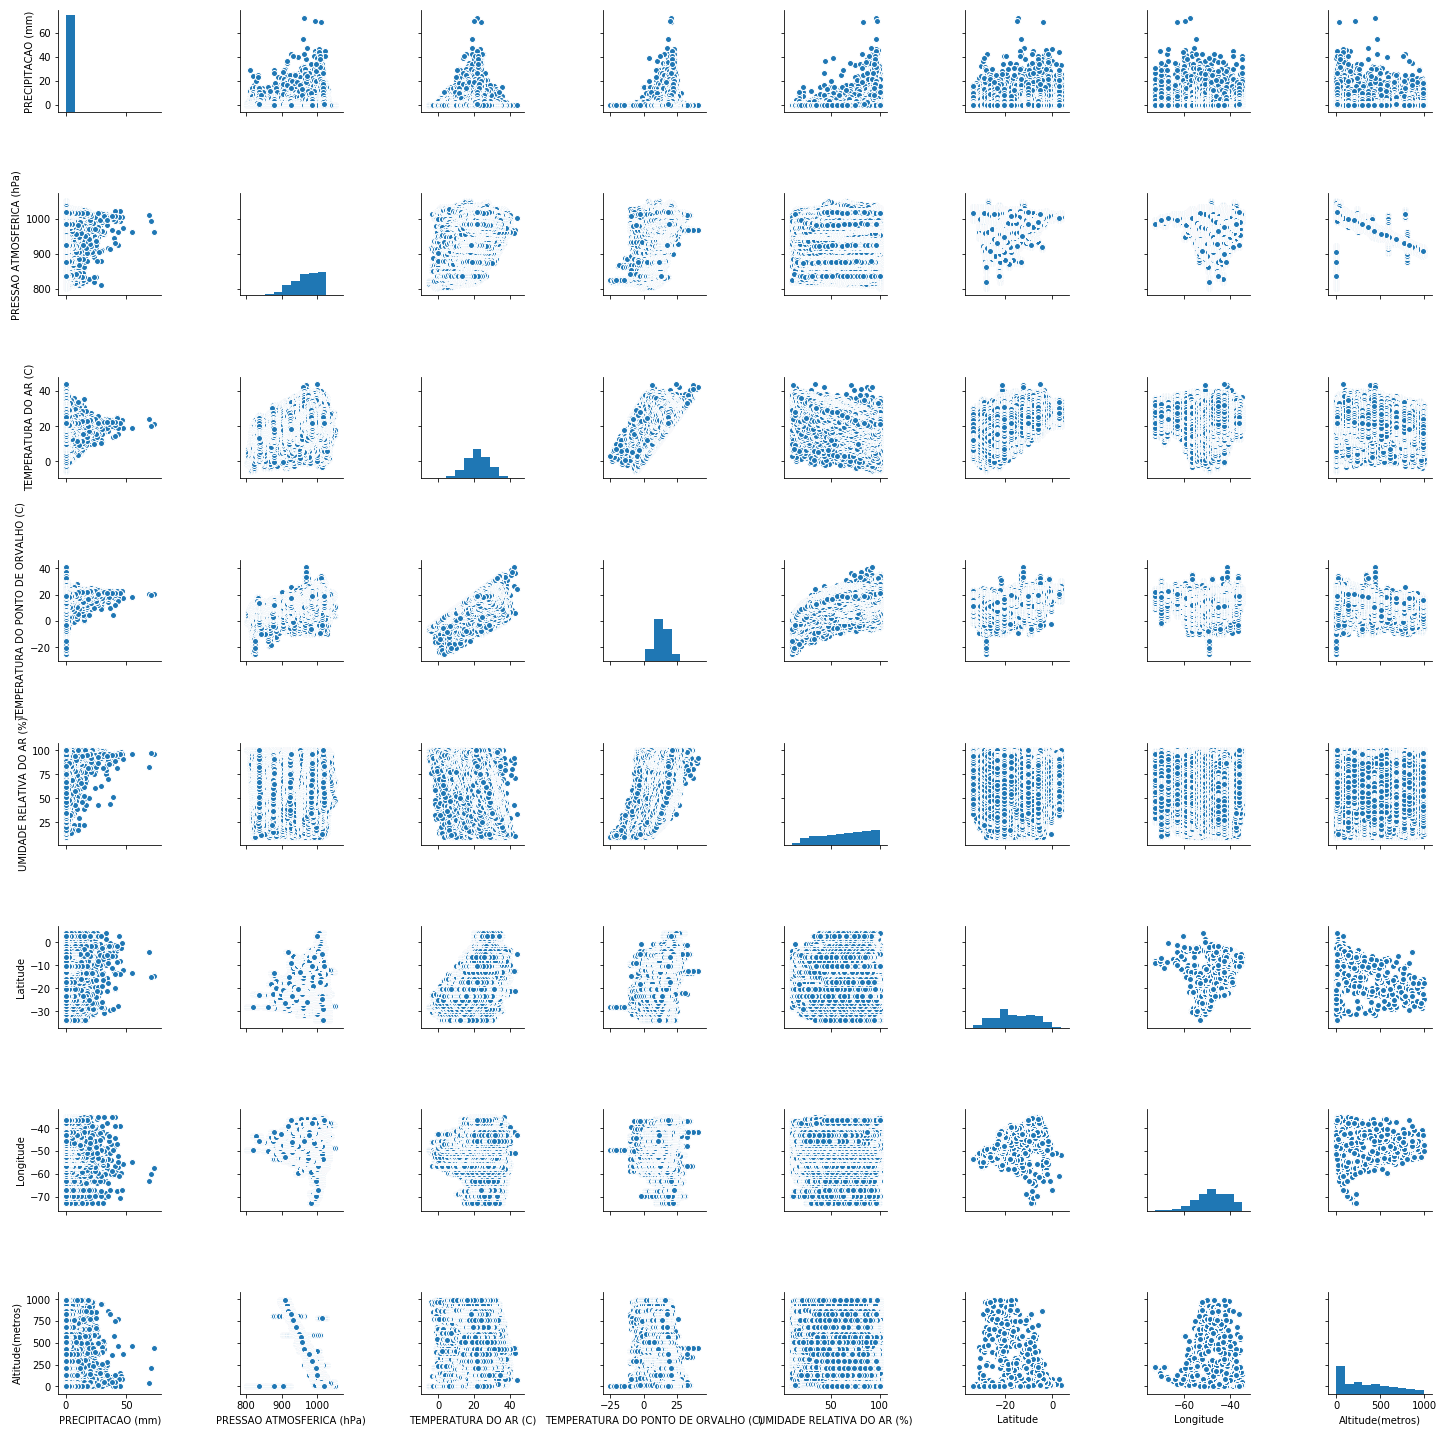

In [52]:
sns.pairplot(data[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                   'UMIDADE RELATIVA DO AR (%)','Latitude','Longitude','Altitude(metros)']].dropna(),)

#### Como podemos ver existe alguns dados fora do padrão dos demais registro, como os dados de Pressão atmosferica que podemos perceber que sua relação com Altidude não esta muito correta. iremos retirar este dados também

In [53]:
plt.figure(figsize=(20, 10), dpi=150)
plt.scatter(data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<955),:]['PRESSAO ATMOSFERICA (hPa)'],
           data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<955),:]['Altitude(metros)'])


In [54]:
data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<955),:].head(10)

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
444408             1.161     86715.0    1       0 -15.789343 -47.925756   
444409             1.161     86715.0    1       1 -15.789343 -47.925756   
444410             1.161     86715.0    1       2 -15.789343 -47.925756   
444411             1.161     86715.0    1       3 -15.789343 -47.925756   
444412             1.161     86715.0    1       4 -15.789343 -47.925756   
444413             1.161     86715.0    1       5 -15.789343 -47.925756   
444414             1.161     86715.0    1       6 -15.789343 -47.925756   
444415             1.161     86715.0    1       7 -15.789343 -47.925756   
444416             1.161     86715.0    1       8 -15.789343 -47.925756   
444417             1.161     86715.0    1       9 -15.789343 -47.925756   

        Month           Nome  PRECIPITACAO (mm)  PRESSAO ATMOSFERICA (hPa)  \
444408      8  Brasília-A001                0.0                      888.3   
444409      8  Brasília-A001                0.0                      888.8   
444410      8  Brasília-A001                0.0                      888.7   
444411      8  Brasília-A001                0.0                      888.6   
444412      8  Brasília-A001                0.0                      888.5   
444413      8  Brasília-A001                0.0                      888.4   
444414      8  Brasília-A001                0.0                      888.2   
444415      8  Brasília-A001                0.0                      888.0   
444416      8  Brasília-A001                0.0                      888.1   
444417      8  Brasília-A001                0.0                      888.6   

        PRESSAO ATMOSFÉRICA MAXIMA (hPa)  PRESSAO ATMOSFÉRICA MINIMA (hPa)  \
444408                             888.3                             887.9   
444409                             888.8                             888.2   
444410                             888.9                             888.7   
444411                             888.8                             888.6   
444412                             888.7                             888.5   
444413                             888.6                             888.4   
444414                             888.4                             888.2   
444415                             888.2                             887.9   
444416                             888.2                             888.0   
444417                             888.6                             888.1   

        RADIACAO GLOBAL (KJ/M2)  TEMPERATURA DO AR (C)  \
444408                      NaN                   18.3   
444409                      NaN                   17.7   
444410                      NaN                   16.9   
444411                      NaN                   16.2   
444412                      NaN                   14.8   
444413                      NaN                   14.0   
444414                      NaN                   14.1   
444415                      NaN                   13.9   
444416                      NaN                   14.5   
444417                      NaN                   14.5   

        TEMPERATURA DO PONTO DE ORVALHO (C)  TEMPERATURA MAXIMA (C)  \
444408                                  1.9                    19.3   
444409                                  2.8                    18.8   
444410                                  3.7                    17.6   
444411                                  3.9                    16.8   
444412                                  3.4                    16.3   
444413                                  3.5                    15.2   
444414                                  3.7                    14.1   
444415                                  3.8                    14.5   
444416                                  4.4                    14.7   
444417                                  4.7                    14.6   

        TEMPERATURA MINIMA (C)  TEMPERATURA

In [55]:
errors = data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<955),:].index.tolist()
print('Numero de resgitros que serão retirados: {}'.format(len(errors)))
data.loc[errors,'PRESSAO ATMOSFERICA (hPa)'] = np.nan

Numero de resgitros que serão retirados: 186098


In [56]:
(data.isnull().sum()/len(data))*100

Altitude(metros)                               0.000000
Codigo OMM                                     0.143671
Day                                            0.000000
H(UTC)                                         0.000000
Latitude                                       0.000000
Longitude                                      0.000000
Month                                          0.000000
Nome                                           0.000000
PRECIPITACAO (mm)                             10.318737
PRESSAO ATMOSFERICA (hPa)                     14.270594
PRESSAO ATMOSFÉRICA MAXIMA (hPa)               8.933270
PRESSAO ATMOSFÉRICA MINIMA (hPa)               8.933270
RADIACAO GLOBAL (KJ/M2)                       54.644995
TEMPERATURA DO AR (C)                          8.538839
TEMPERATURA DO PONTO DE ORVALHO (C)            9.398929
TEMPERATURA MAXIMA (C)                         8.543321
TEMPERATURA MINIMA (C)                         8.545780
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     9

## Retirando os dados ausentes

### por trabalhamos com medias não iremos fazer recuperação dos dados ausentes apenas discarta-los.
### mas primeiro iremos descarta o atribulto de radiação global, que ja ele esta ausente em 50% da base

In [57]:
data.drop(columns=['RADIACAO GLOBAL (KJ/M2)','VENTO VELOCIDADE ','VENTO, DIRECAO (graus)','VENTO, RAJADA MAXIMA (m/s)'],inplace=True)

In [58]:
data.dropna(inplace=True)

In [59]:
data.to_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_data_clean_v2.csv')

In [60]:
data.describe().T

count          mean  \
Altitude(metros)                            2860449.0    374.594564   
Codigo OMM                                  2860449.0  85299.983600   
Day                                         2860449.0     16.051355   
H(UTC)                                      2860449.0     11.552443   
Latitude                                    2860449.0    -15.667031   
Longitude                                   2860449.0    -47.582113   
Month                                       2860449.0      8.000000   
PRECIPITACAO (mm)                           2860449.0      0.057388   
PRESSAO ATMOSFERICA (hPa)                   2860449.0    973.498881   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            2860449.0    973.774250   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            2860449.0    973.229003   
TEMPERATURA DO AR (C)                       2860449.0     22.389161   
TEMPERATURA DO PONTO DE ORVALHO (C)         2860449.0     13.820731   
TEMPERATURA MAXIMA (C)                      2860449.0     23.129556   
TEMPERATURA MINIMA (C)                      2860449.0     21.673251   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  2860449.0     14.377774   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  2860449.0     13.281777   
UMIDADE RELATIVA DO AR (%)                  2860449.0     63.627661   
UMIDADE RELATIVA DO MAXIMA AR (%)           2860449.0     66.506157   
UMIDADE RELATIVA DO MINIMA AR (%)           2860449.0     60.747916   
Year                                        2860449.0   2011.458522   

                                                    std           min  \
Altitude(metros)                             285.433611      2.000000   
Codigo OMM                                  2283.044493  81609.000000   
Day                                            8.945708      1.000000   
H(UTC)                                         6.927550      0.000000   
Latitude                                       8.212756    -33.742297   
Longitude                                      6.860543    -72.786778   
Month                                          0.000000      8.000000   
PRECIPITACAO (mm)                              0.567935      0.000000   
PRESSAO ATMOSFERICA (hPa)                     31.527841    877.100000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              31.539030    877.800000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              31.516785    877.100000   
TEMPERATURA DO AR (C)                          6.400566     -3.800000   
TEMPERATURA DO PONTO DE ORVALHO (C)            5.085865     -9.600000   
TEMPERATURA MAXIMA (C)                         6.520244     -3.500000   
TEMPERATURA MINIMA (C)                         6.268262     -7.200000   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     5.015366     -8.500000   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     5.162018    -11.600000   
UMIDADE RELATIVA DO AR (%)                    22.982847     10.000000   
UMIDADE RELATIVA DO MAXIMA AR (%)             22.492331     10.000000   
UMIDADE RELATIVA DO MINIMA AR (%)             23.269806     10.000000   
Year                                           3.125654   2000.000000   

                                                    25%           50%  \
Altitude(metros)                              107.00000    339.000000   
Codigo OMM                                  81958.00000  86722.000000   
Day                                             8.00000     16.000000   
H(UTC)                                          6.00000     12.000000   
Latitude                                      -22.19392    -15.751536   
Longitude                                     -52.38198    -47.947967   
Month                                           8.00000      8.000000   
PRECIPITACAO (mm)                               0.00000      0.000000   
PRESSAO ATMOSFERICA (hPa)                     950.50000    976.600000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              950.80000    976.900000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              950.30000    976.400000   
TE

In [61]:
sns.pairplot(data[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                   'UMIDADE RELATIVA DO AR (%)','Latitude','Longitude','Altitude(metros)']].dropna(),)

### Fazendo a base de dados com as medias mensais de cada estação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
month_num = str(8)
data = pd.read_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_data_clean_v2.csv').drop(columns=['Unnamed: 0'])
data.head(8)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
0             185.0     81963.0    1       0 -9.358353 -69.926257      8   
1             185.0     81963.0    1       1 -9.358353 -69.926257      8   
2             185.0     81963.0    1       2 -9.358353 -69.926257      8   
3             185.0     81963.0    1       3 -9.358353 -69.926257      8   
4             185.0     81963.0    1       4 -9.358353 -69.926257      8   
5             185.0     81963.0    1      10 -9.358353 -69.926257      8   
6             185.0     81963.0    1      11 -9.358353 -69.926257      8   
7             185.0     81963.0    1      13 -9.358353 -69.926257      8   

                             Nome  PRECIPITACAO (mm)  \
0  Parque Estadual Chandless-A102                0.0   
1  Parque Estadual Chandless-A102                0.0   
2  Parque Estadual Chandless-A102                0.0   
3  Parque Estadual Chandless-A102                0.0   
4  Parque Estadual Chandless-A102                0.0   
5  Parque Estadual Chandless-A102                0.0   
6  Parque Estadual Chandless-A102                0.0   
7  Parque Estadual Chandless-A102                0.0   

   PRESSAO ATMOSFERICA (hPa)   ...    TEMPERATURA MINIMA (C)  \
0                      990.9   ...                      23.3   
1                      991.5   ...                      22.8   
2                      991.8   ...                      22.2   
3                      992.1   ...                      21.8   
4                      992.3   ...                      21.4   
5                      992.3   ...                      20.6   
6                      992.9   ...                      20.3   
7                      994.2   ...                      21.0   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                        22.8   
1                                        22.2   
2                                        21.9   
3                                        21.4   
4                                        21.2   
5                                        20.1   
6                                        20.0   
7                                        22.5   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                        22.2                        94.0   
1                                        21.8                        95.0   
2                                        21.3                        95.0   
3                                        21.1                        96.0   
4                                        20.7                        96.0   
5                                        20.0                        97.0   
6                                        19.8                        97.0   
7                                        20.5                        93.0   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  Year  \
0                               94.0                               91.0  2009   
1                               95.0                               93.0  2009   
2                               95.0                               94.0  2009   
3                               96.0                               95.0  2009   
4                               96.0                               95.0  2009   
5                               97.0                               96.0  2009   
6                               97.0                               96.0  2009   
7                               97.0                               93.0  2009   

                      Cidade  Estado  Regiao  
0  Parque Estadual Chandless    Acre   Norte  
1  Parque Estadual Chandless    Acre   Norte  
2  Parque Estadual Chandless    Acre   Norte  
3  Parque Estadual Chandless    Acre   Norte  
4  Parque Estadual Chandless    Acre   Norte  
5  Parque Estadual Chandless    Acre   Norte  
6  Parque Estadual Chandless    Acre   No

In [2]:
data_mean = data.groupby(['Nome']).agg('mean')
data_mean.to_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_mean.csv')
data_mean.head(5)

Altitude(metros)  Codigo OMM        Day     H(UTC)  \
Nome                                                                      
Abrolhos-A422                    21.0     86765.0  15.450338  11.478303   
Acaraú-A360                      67.0     81755.0  15.850763  11.622441   
Afonso Cláudio-A657             507.0     86827.0  15.955694  11.528133   
Aimorés-A534                    288.0     86803.0  16.223044  11.731480   
Alegre-A617                     129.0     86828.0  16.017648  11.491176   

                      Latitude  Longitude  Month  PRECIPITACAO (mm)  \
Nome                                                                  
Abrolhos-A422       -17.963016 -38.703288    8.0           0.029251   
Acaraú-A360          -3.121067 -40.087288    8.0           0.005880   
Afonso Cláudio-A657 -20.104194 -41.106861    8.0           0.015656   
Aimorés-A534        -19.532768 -41.090801    8.0           0.005849   
Alegre-A617         -20.750412 -41.488852    8.0           0.024384   

                     PRESSAO ATMOSFERICA (hPa)  \
Nome                                             
Abrolhos-A422                      1017.094407   
Acaraú-A360                        1005.611109   
Afonso Cláudio-A657                 961.340038   
Aimorés-A534                        990.936462   
Alegre-A617                        1004.367008   

                     PRESSAO ATMOSFÉRICA MAXIMA (hPa)     ...       \
Nome                                                      ...        
Abrolhos-A422                             1017.322115     ...        
Acaraú-A360                               1005.887942     ...        
Afonso Cláudio-A657                        961.580810     ...        
Aimorés-A534                               991.201302     ...        
Alegre-A617                               1004.631658     ...        

                     TEMPERATURA DO AR (C)  \
Nome                                         
Abrolhos-A422                    24.042012   
Acaraú-A360                      26.978005   
Afonso Cláudio-A657              19.981462   
Aimorés-A534                     22.632621   
Alegre-A617                      21.545117   

                     TEMPERATURA DO PONTO DE ORVALHO (C)  \
Nome                                                       
Abrolhos-A422                                  18.567792   
Acaraú-A360                                    19.851749   
Afonso Cláudio-A657                            13.015874   
Aimorés-A534                                   14.672987   
Alegre-A617                                    14.552054   

                     TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
Nome                                                                  
Abrolhos-A422                     24.423529               23.675088   
Acaraú-A360                       27.636453               26.367529   
Afonso Cláudio-A657               20.723267               19.291411   
Aimorés-A534                      23.369998               21.963490   
Alegre-A617                       22.302075               20.815681   

                     TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
Nome                                                              
Abrolhos-A422                                         19.097943   
Acaraú-A360                                           20.309918   
Afonso Cláudio-A657                                   13.496847   
Aimorés-A534                                          15.150683   
Alegre-A617                                           15.069756   

                     TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
Nome                                                              
Abrolhos-A422                                         18.038862   
Acaraú-A360                                           19.399200   
Afonso Cláudio-A657                                   12.537918   
Aimorés-A534                                          14.198393   
Alegre-A617                              

In [3]:
data_mean['Precipitação Acum.(mm)'] = data.groupby(['Nome','Year']).agg('sum').groupby('Nome').agg('mean')['PRECIPITACAO (mm)']

data_mean.to_csv('./Tempo-Clima/Dados/Brasil_8_mean.csv')

In [4]:
data_mean.describe().T

count          mean          std  \
Altitude(metros)                            468.0    367.119658   282.163663   
Codigo OMM                                  468.0  85223.752137  2315.358203   
Day                                         468.0     16.071623     0.416195   
H(UTC)                                      468.0     11.552209     0.126788   
Latitude                                    468.0    -15.393529     8.258124   
Longitude                                   468.0    -47.985259     7.214612   
Month                                       468.0      8.000000     0.000000   
PRECIPITACAO (mm)                           468.0      0.056369     0.063121   
PRESSAO ATMOSFERICA (hPa)                   468.0    974.167542    30.927305   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            468.0    974.442797    30.936778   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            468.0    973.897267    30.918956   
TEMPERATURA DO AR (C)                       468.0     22.546904     4.120797   
TEMPERATURA DO PONTO DE ORVALHO (C)         468.0     13.964936     4.084767   
TEMPERATURA MAXIMA (C)                      468.0     23.293924     4.182997   
TEMPERATURA MINIMA (C)                      468.0     21.823562     4.066033   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  468.0     14.529813     4.058047   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  468.0     13.418350     4.114575   
UMIDADE RELATIVA DO AR (%)                  468.0     63.627430    13.919670   
UMIDADE RELATIVA DO MAXIMA AR (%)           468.0     66.542968    13.716423   
UMIDADE RELATIVA DO MINIMA AR (%)           468.0     60.716578    14.040964   
Year                                        468.0   2011.845039     1.365033   
Precipitação Acum.(mm)                      468.0     39.766707    45.457938   

                                                     min           25%  \
Altitude(metros)                                2.000000    112.000000   
Codigo OMM                                  81609.000000  81951.750000   
Day                                            12.961975     15.967339   
H(UTC)                                         10.939145     11.494913   
Latitude                                      -33.742297    -21.886764   
Longitude                                     -72.786778    -52.900595   
Month                                           8.000000      8.000000   
PRECIPITACAO (mm)                               0.000000      0.007552   
PRESSAO ATMOSFERICA (hPa)                     906.768525    952.962715   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              906.999313    953.227630   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              906.522570    952.707843   
TEMPERATURA DO AR (C)                          12.610912     20.162672   
TEMPERATURA DO PONTO DE ORVALHO (C)             7.737772     10.593846   
TEMPERATURA MAXIMA (C)                         13.167815     20.932203   
TEMPERATURA MINIMA (C)                         12.019615     19.306606   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)      8.332838     11.176662   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)      7.194590     10.010868   
UMIDADE RELATIVA DO AR (%)                     34.846968     51.219364   
UMIDADE RELATIVA DO MAXIMA AR (%)              37.862505     55.022961   
UMIDADE RELATIVA DO MINIMA AR (%)              32.178056     47.956545   
Year                                         2008.497960   2011.277721   
Precipitação Acum.(mm)                          0.000000      5.300000   

                                                     50%           75%  \
Altitude(metros)                              325.500000    560.500000   
Codigo OMM                                  86709.500000  86854.250000   
Day                                            16.010348     16.131188   
H(UTC)                                         11.507641     11.574038   
Latitude                                      -15.290187     -8.576477   
Longitude                                     -48.193060

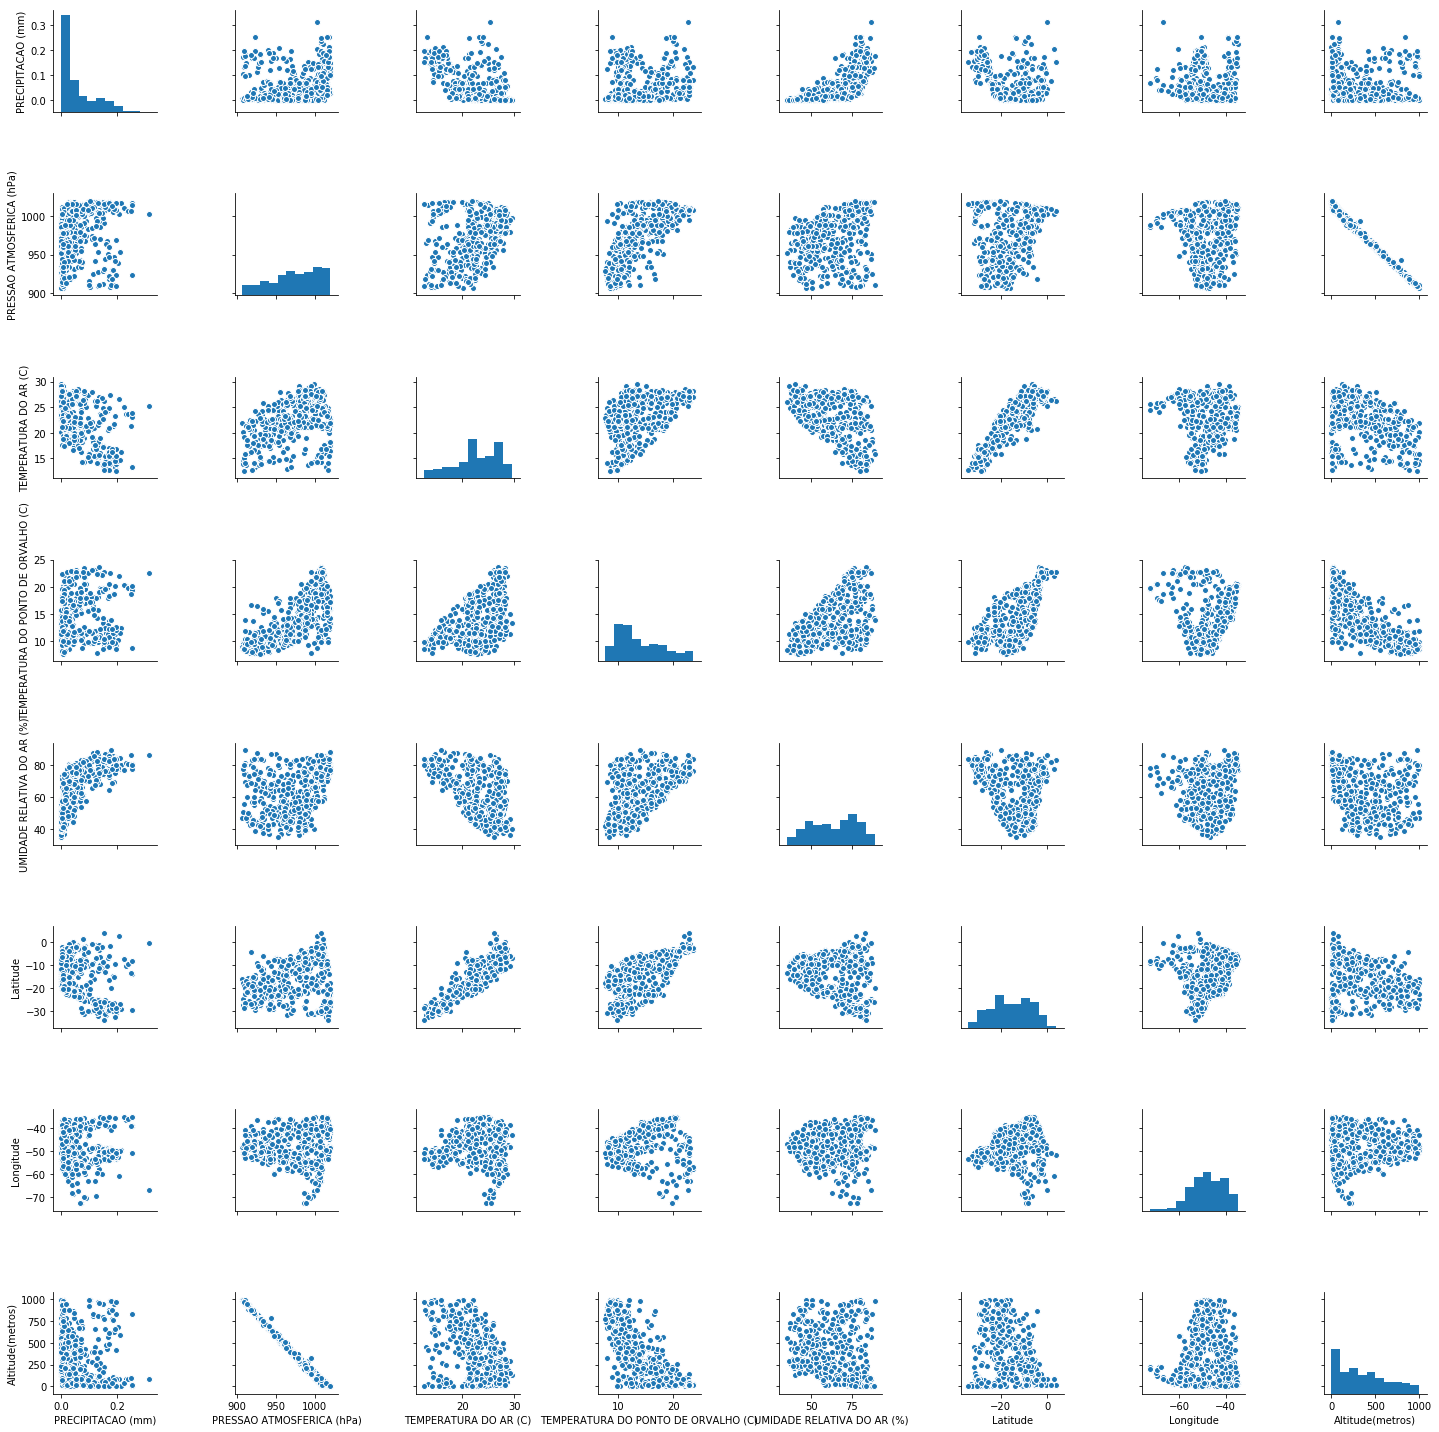

In [64]:
sns.pairplot(data_mean[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [104]:
target_wanderlay = ['UMIDADE RELATIVA DO AR (%)']
features_UR_wanderlay = data_mean.columns.tolist()
features_UR_wanderlay.remove('Day')
features_UR_wanderlay.remove('Month')
features_UR_wanderlay.remove('Codigo OMM')
features_UR_wanderlay.remove('Year')
features_UR_wanderlay.remove('H(UTC)')
#features_UR_wanderlay.remove('VENTO VELOCIDADE ')
#features_UR_wanderlay.remove('VENTO, DIRECAO (graus)')
#features_UR_wanderlay.remove('VENTO, RAJADA MAXIMA (m/s)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO AR (%)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO MINIMA AR (%)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO MAXIMA AR (%)')
features_UR_wanderlay.remove('TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA DO AR (C)')
#features_UR_wanderlay.remove('TEMPERATURA MAXIMA (C)')
#features_UR_wanderlay.remove('TEMPERATURA MINIMA (C)')
features_UR_wanderlay.remove('PRECIPITACAO (mm)')
features_UR_wanderlay.remove('PRESSAO ATMOSFERICA (hPa)')
features_UR_wanderlay.remove('PRESSAO ATMOSFÉRICA MAXIMA (hPa)')
features_UR_wanderlay.remove('PRESSAO ATMOSFÉRICA MINIMA (hPa)')




features_UR_wanderlay

['Altitude(metros)',
 'Latitude',
 'Longitude',
 'TEMPERATURA MAXIMA (C)',
 'TEMPERATURA MINIMA (C)']

In [139]:
from sklearn.model_selection import train_test_split

X_ur_train, X_ur_test, y_ur_train, y_ur_test = train_test_split(data_mean[features_UR_wanderlay], data_mean[target_wanderlay],test_size=.25)

In [140]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(-0.8,0.8))
scaler_y = MinMaxScaler(feature_range=(-0.8,0.8))

scaler_x.fit(X_ur_train)
X_ur_train = scaler_x.transform(X_ur_train)
X_ur_test  = scaler_x.transform(X_ur_test)

scaler_y.fit(y_ur_train)
y_ur_train = scaler_y.transform(y_ur_train)
y_ur_test  = scaler_y.transform(y_ur_test)

In [141]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='adam', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_ur_train,y_ur_train.ravel())
y_ur_pred = mlp.predict(X_ur_test)


In [142]:
import sklearn.metrics as metrics
print('Variance: {}'.format(metrics.explained_variance_score(scaler_y.inverse_transform(y_ur_test).ravel(),scaler_y.inverse_transform([y_ur_pred,]).ravel())))
print('Erro absoluto medio: {}'.format(metrics.mean_absolute_error(scaler_y.inverse_transform(y_ur_test).ravel(),scaler_y.inverse_transform([y_ur_pred,]).ravel())))
print('Erro quadrado medio: {}'.format(metrics.mean_squared_error(scaler_y.inverse_transform(y_ur_test).ravel(),scaler_y.inverse_transform([y_ur_pred,]).ravel())))
print('Erro absoluto mediano: {}'.format(metrics.median_absolute_error(scaler_y.inverse_transform(y_ur_test).ravel(),scaler_y.inverse_transform([y_ur_pred,]).ravel())))
print('R2 Score: {}'.format(metrics.r2_score(scaler_y.inverse_transform(y_ur_test).ravel(),scaler_y.inverse_transform([y_ur_pred,]).ravel())))

Variance: 0.9653796516120025
Erro absoluto medio: 2.1481059366106128
Erro quadrado medio: 7.4571418836581005
Erro absoluto mediano: 1.715732824058577
R2 Score: 0.9647046750694753


In [143]:
errors=abs(scaler_y.inverse_transform(y_ur_test).ravel()-scaler_y.inverse_transform([y_ur_pred,]))
print('Error(UR_true - UR_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Error(UR_true - UR_pred)
MIN: 0.003334676550657889 	MAX: 6.877073717965331 	MEAN: 2.1481059366106128	Std: 1.6860553872148871


In [144]:
df_rest = pd.DataFrame(data = scaler_y.inverse_transform(y_ur_test).ravel(),columns=['Y_true'])
df_rest['Y_pred'] = scaler_y.inverse_transform([y_ur_pred,]).ravel()
df_rest.sort_values(['Y_pred','Y_true']).head(5)

Y_true     Y_pred
24  36.901924  32.725715
80  36.126530  36.533817
22  34.846968  36.611729
69  38.908120  37.293235
8   36.976722  37.545502

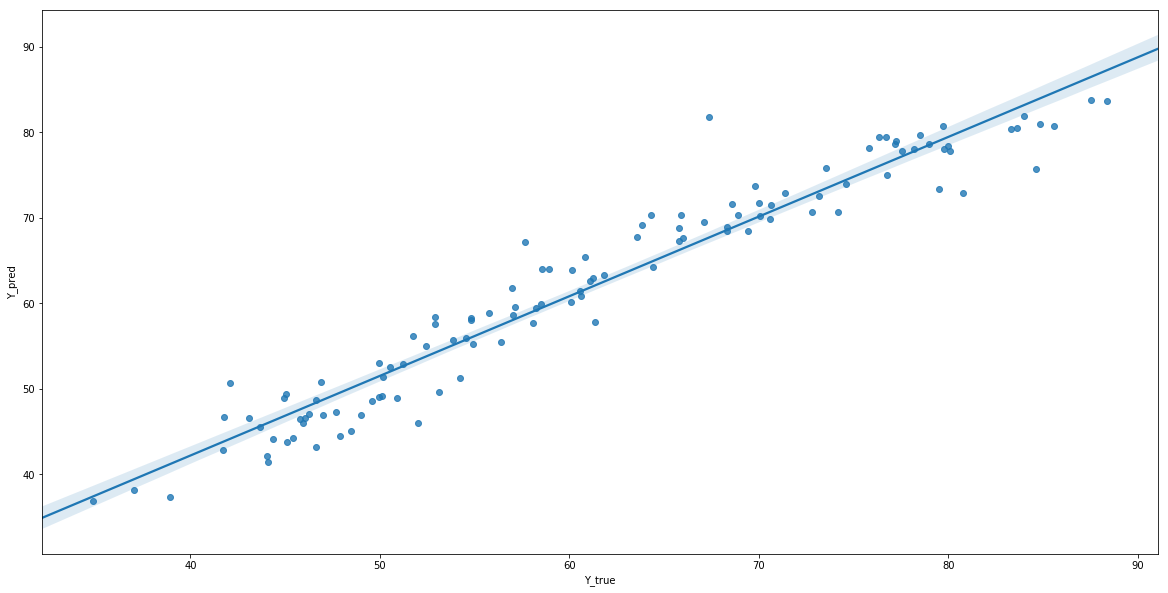

In [182]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(x="Y_true", y="Y_pred", data=df_rest,ax=ax)

In [165]:
target_tmin = ['TEMPERATURA MINIMA (C)']
features_tmin = data_mean.columns.tolist()
features_tmin.remove('Day')
features_tmin.remove('Month')
features_tmin.remove('Codigo OMM')
features_tmin.remove('Year')
features_tmin.remove('H(UTC)')
features_tmin.remove('UMIDADE RELATIVA DO AR (%)')
#features_tmin.remove('UMIDADE RELATIVA DO MINIMA AR (%)')
#features_tmin.remove('UMIDADE RELATIVA DO MAXIMA AR (%)')
features_tmin.remove('TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)')
features_tmin.remove('TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)')
features_tmin.remove('TEMPERATURA DO PONTO DE ORVALHO (C)')
features_tmin.remove('TEMPERATURA DO AR (C)')
features_tmin.remove('TEMPERATURA MAXIMA (C)')
features_tmin.remove('TEMPERATURA MINIMA (C)')
features_tmin.remove('PRECIPITACAO (mm)')
features_tmin.remove('PRESSAO ATMOSFERICA (hPa)')
features_tmin.remove('PRESSAO ATMOSFÉRICA MAXIMA (hPa)')
features_tmin.remove('PRESSAO ATMOSFÉRICA MINIMA (hPa)')
features_tmin

['Altitude(metros)',
 'Latitude',
 'Longitude',
 'UMIDADE RELATIVA DO MAXIMA AR (%)',
 'UMIDADE RELATIVA DO MINIMA AR (%)']

In [166]:
from sklearn.model_selection import train_test_split

X_tmin_train, X_tmin_test, y_tmin_train, y_tmin_test = train_test_split(data_mean[features_UR_wanderlay], data_mean[target_wanderlay],test_size=.25)

In [167]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(-0.8,0.8))
scaler_y = MinMaxScaler(feature_range=(-0.8,0.8))

scaler_x.fit(X_tmin_train)
X_tmin_train = scaler_x.transform(X_tmin_train)
X_tmin_test  = scaler_x.transform(X_tmin_test)

scaler_y.fit(y_tmin_train)
y_tmin_train = scaler_y.transform(y_tmin_train)
y_tmin_test  = scaler_y.transform(y_tmin_test)

In [173]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='adam', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_tmin_train,y_tmin_train.ravel())
y_tmin_pred = mlp.predict(X_tmin_test)


In [174]:
import sklearn.metrics as metrics
print('Variance: {}'.format(metrics.explained_variance_score(scaler_y.inverse_transform(y_tmin_test).ravel(),scaler_y.inverse_transform([y_tmin_pred,]).ravel())))
print('Erro absoluto medio: {}'.format(metrics.mean_absolute_error(scaler_y.inverse_transform(y_tmin_test).ravel(),scaler_y.inverse_transform([y_tmin_pred,]).ravel())))
print('Erro quadrado medio: {}'.format(metrics.mean_squared_error(scaler_y.inverse_transform(y_tmin_test).ravel(),scaler_y.inverse_transform([y_tmin_pred,]).ravel())))
print('Erro absoluto mediano: {}'.format(metrics.median_absolute_error(scaler_y.inverse_transform(y_tmin_test).ravel(),scaler_y.inverse_transform([y_tmin_pred,]).ravel())))
print('R2 Score: {}'.format(metrics.r2_score(scaler_y.inverse_transform(y_tmin_test).ravel(),scaler_y.inverse_transform([y_tmin_pred,]).ravel())))

Variance: 0.9372747569459047
Erro absoluto medio: 2.607425803849586
Erro quadrado medio: 11.760408532054749
Erro absoluto mediano: 2.000710527834812
R2 Score: 0.933931146322845


In [175]:
errors=abs(scaler_y.inverse_transform(y_tmin_test).ravel()-scaler_y.inverse_transform([y_tmin_pred,]))
print('Error(tmin_true - tmin_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Error(tmin_true - tmin_pred)
MIN: 0.0849582106235971 	MAX: 14.462945653504207 	MEAN: 2.607425803849586	Std: 2.227496174962842


In [176]:
df_rest = pd.DataFrame(data = scaler_y.inverse_transform(y_tmin_test).ravel(),columns=['Y_true'])
df_rest['Y_pred'] = scaler_y.inverse_transform([y_tmin_pred,]).ravel()
df_rest.sort_values(['Y_pred','Y_true']).head(5)

Y_true     Y_pred
115  34.846968  36.944177
1    38.908120  37.386388
84   37.034565  38.150176
68   44.113300  41.464694
83   44.033120  42.180579

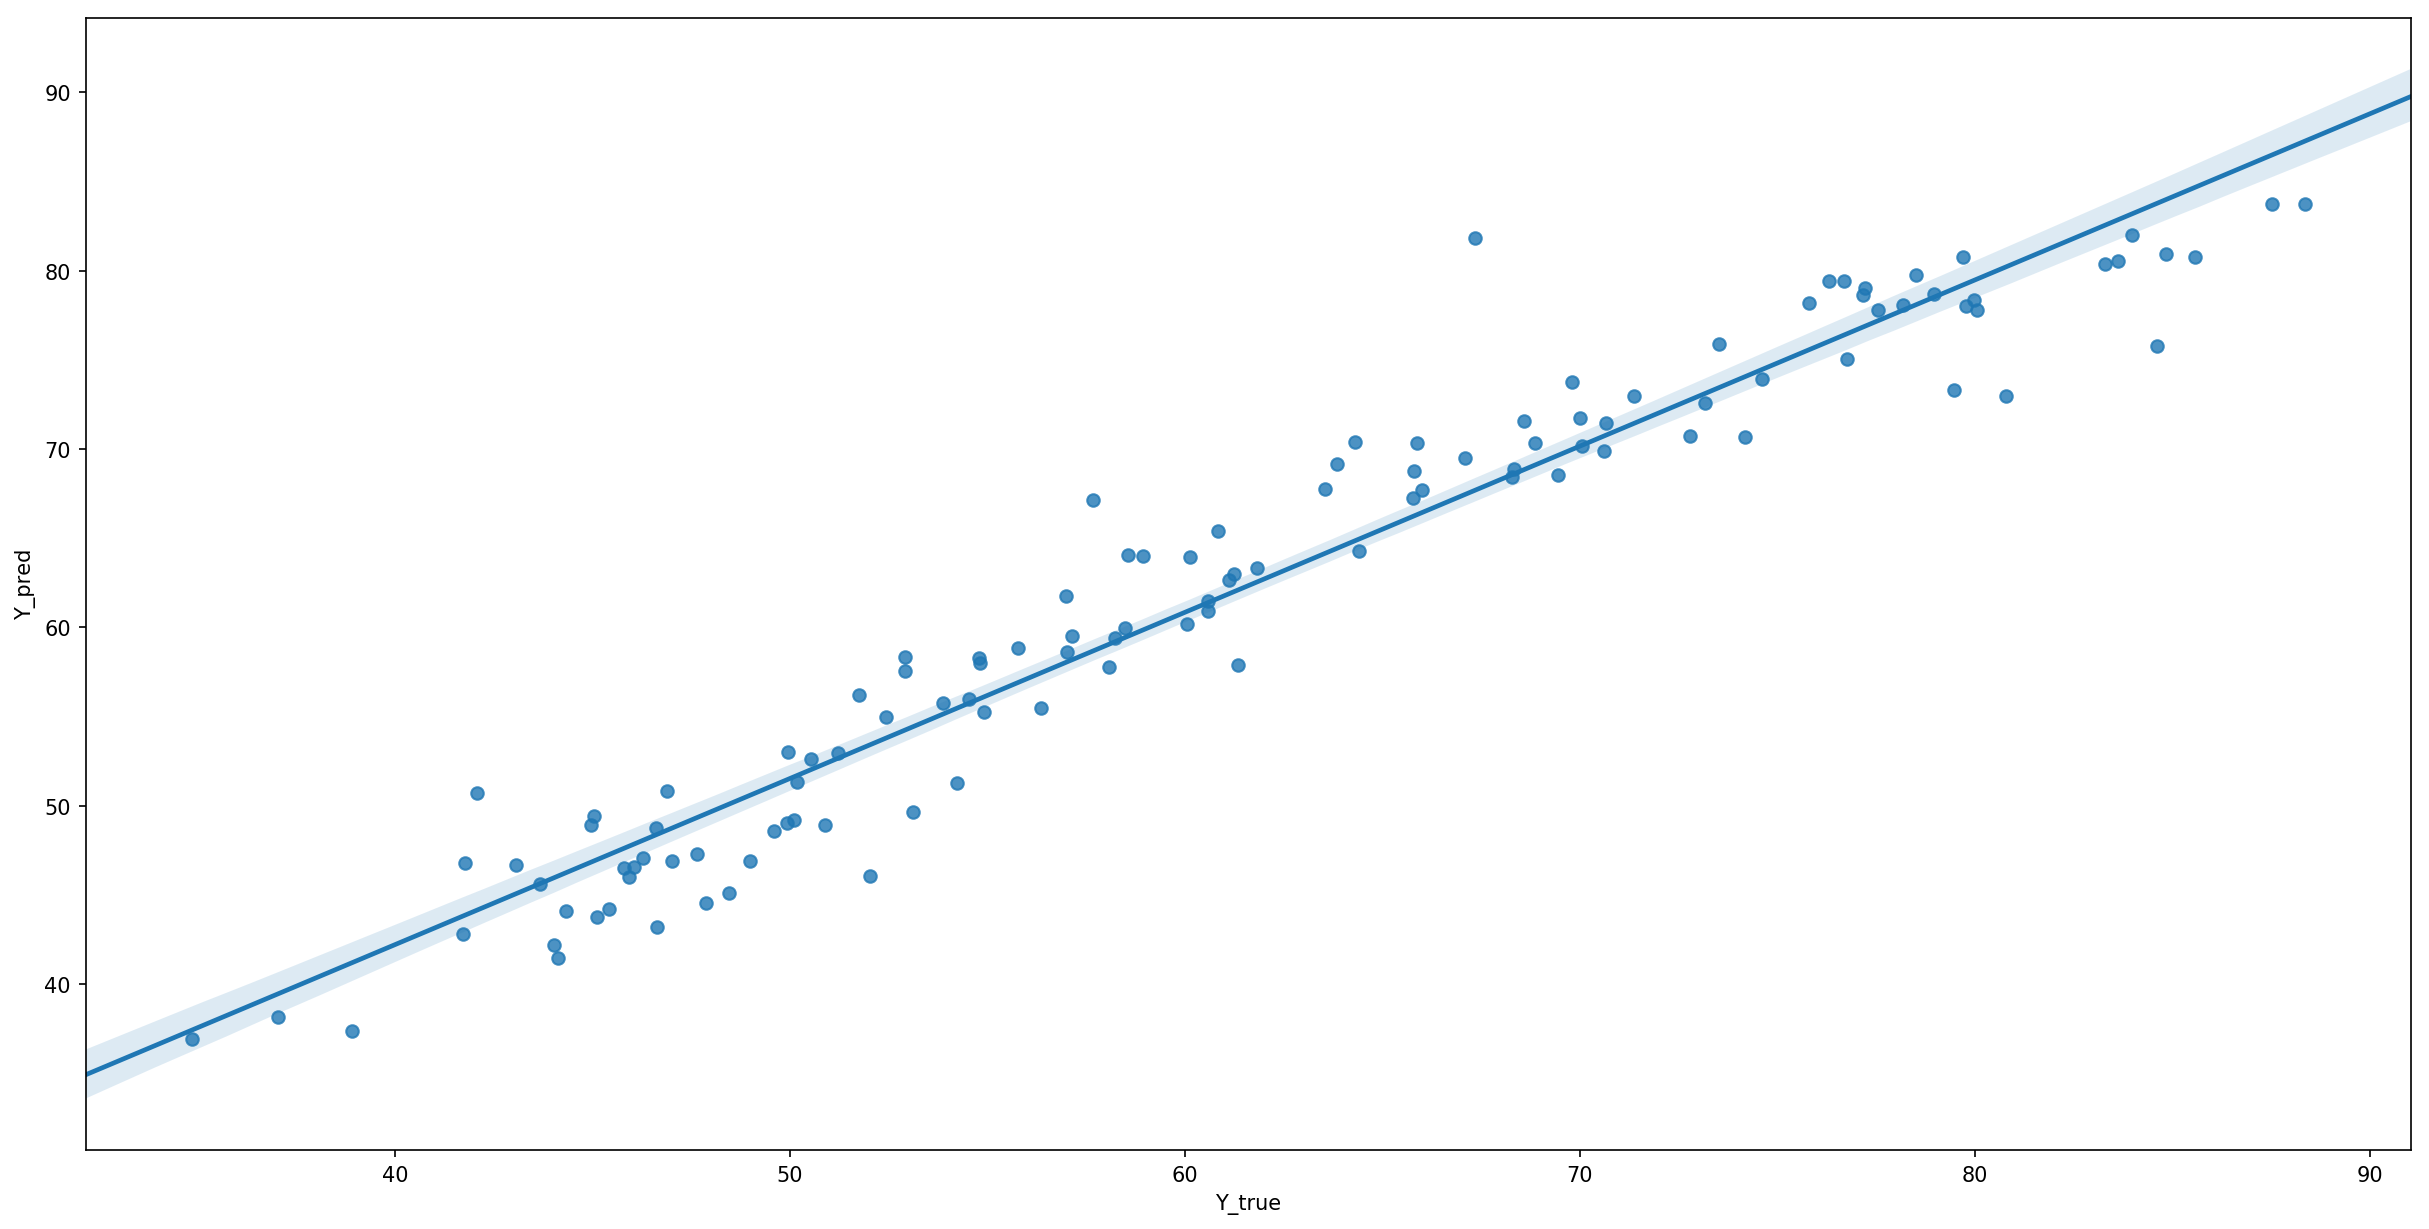

In [177]:
fig,ax = plt.subplots(figsize=(20,10),dpi=150)
sns.regplot(x="Y_true", y="Y_pred", data=df_rest,ax=ax)